<a href="https://colab.research.google.com/github/fppfurtado/mvp-pos-ciencia-de-dados/blob/main/Projeto_MVP_Sprint_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contextualização e Descrição do Problema

A empresa XPTO, distribuidora de pequeno porte, trabalha comprando e revendendo mercadorias de terceiros, e fazendo a entrega dos pedidos no endereço do cliente. Atualmente está com problemas financeiros, precisando cortar gastos
 e aumentar seu faturamento para equilibrar seu fluxo de caixa. A Administração da Empresa deseja revisar  seu catálogo de produtos e eliminar do catálogo produtos que sejam comercialmente irrelevantes para poupar capital de giro, esforço de estoque e focar nos produtos de maior impacto no seu faturamento.

No Sistema de Gestão da Empresa, cada venda é efetuada por meio do registro de um Pedido de Venda. Cada Pedido de Venda é vinculado a somente um cliente e pode conter um ou mais itens do catálogo de produtos que tenham estoque positivo.

Dentre os relatórios disponibilizados pelo Sistema, destacam-se as seguintes opções para subsidiar a análise proposta:

- (I) Vendas Por Período
- (II) Itens por Pedido de Venda
- (III) Curva ABC de Itens Vendidos

O relatório (I) apresenta informações gerais sobre as vendas registradas, sem incluir os itens vendidos; o relatório (II) relaciona os itens vendidos com o código identificador do respectivo Pedido de Venda; e o relatório (III) é um relatório gerencial da análise ABC dos produtos vendidos.

A Análise ABC é um método para classificar os itens vendidos de acordo com sua participação no faturamento bruto da empresa em determinado período, nos seguintes grupos:
+ **Grupo A**: 20% do catálogo de produtos com maior participação no faturamento total do período;
+ **Grupo B**: 30% do catálogo de produtos, seguinte ao Grupo A, com maiores participações no faturamento total do período;
+ **Grupo C**: 50% restante do catálogo de produtos, que correspondem ao restante do faturamento no período apurado.

Por meio dessa classificação é possível traçar um gráfico conhecido como Curva ABC que relaciona a porcentagem de participação no catálogo de produtos com a porcentagem de participação do faturamento do período apurado.

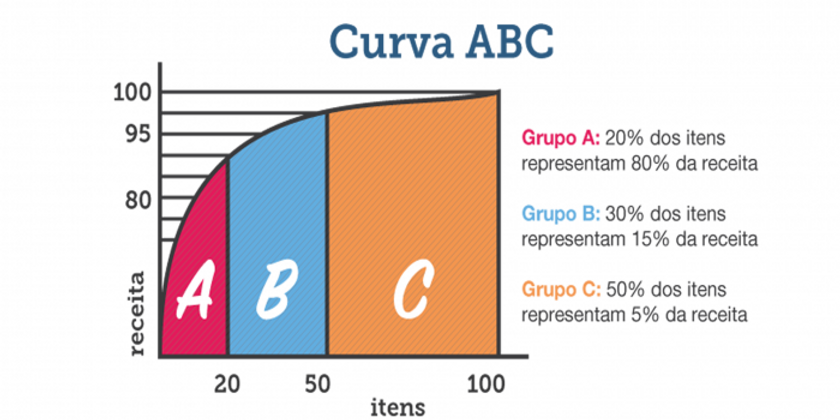

Dessa forma, uma possível solução para o problema da empresa XPTO é analisar a viabilidade de eliminação total ou parcial dos produtos do grupo C, mantendo assim no catálogo de produtos apenas itens de maior impacto econômico para a empresa.

**OBSERVAÇÃO**: os dados utilizados no presente trabalho são dados comerciais de uma empresa real, cuja identidade não será revelada, mas que tiveram sua utlização devidamente autorizada.

## Objetivos

Eliminar do catalógo de produtos todos os itens que, no período de um ano, não impactem em mais de 5% do faturamento bruto da Empresa.

Para isso precisamos analisar o impacto das vendas que possuem somente itens do grupo C e vendas que possuem itens do grupo C junto com itens de outros grupos, para avaliar a viabilidade de eliminar total ou parcialmente os itens do grupo C.

### Perguntas a Responder

**VENDAS SOMENTE COM ITENS DO GRUPO C**
- (I) Quais itens do grupo C não foram vendidos juntos com outros itens do grupo A ou B?
- (II) Qual a quantidade dos itens em (I)?
- (III) Qual o total de faturamento dos itens em (I)?
- (IV) Qual a participação (%) no faturamento total dos itens em (I)?

**VENDAS COM ITENS DO GRUPO C JUNTO COM ITENS DE OUTROS GRUPOS**
- (I) Quantos itens do grupo C foram vendidos juntos com outros itens do grupo A ou B?
- (II) Qual a quantidade dos itens em (I)?
- (III) Qual o total de faturamento dos itens em (I)?
- (IV) Qual a participação (%) no faturamento total dos itens em (I)?

## Busca Pelos Dados

Os dados utilizados no trabalho serão dados provenientes do sistema ERP de uma empresa real cuja identidade não será revelada, com uso devidamente autorizado. O forma de acesso aos dados será por meio dos três relatórios mencionados na seção de Contextualização, gerados pelo Sistema em formato Excel, com as seguintes informações:
- Vendas Por Período
- Itens por Pedido de Venda
- Curva ABC de Itens Vendidos

O período de apuração para geração dos relatórios será de 25/08/2022 a 25/08/2023.

## Coleta

Para desenvolver o presente projeto optamos por utilizar os recursos e ferramentas da Google Cloud, que disponibiliza créditos gratuitos e período de teste para usuários que criarem conta na plataforma.

O Google Cloud Storage (GSC) é o serviço de armazenamento em nuvem do Google Cloud, onde arquivos de diversos tamanhos e formatos podem ser armazenados. Buckets (baldes) são as abstrações do GSC que funcionam como espaços de armazenamento, onde os arquivos ficarão organizados.

Os relatórios utilizados no projeto foram baixados em formato de planilhas Excel, para então serem carregados para o GCS e submetidos ao pipeline e análise de dados.

## Modelagem

O Google Cloud oferece uma ferramenta faz o gerenciamento e governança de dados, incluindo criação e gerenciamento de Data Lakes, chamada Dataplex. Para cada Lake criada é necessário criar uma ou mais Zonas onde os dados serão alocados.

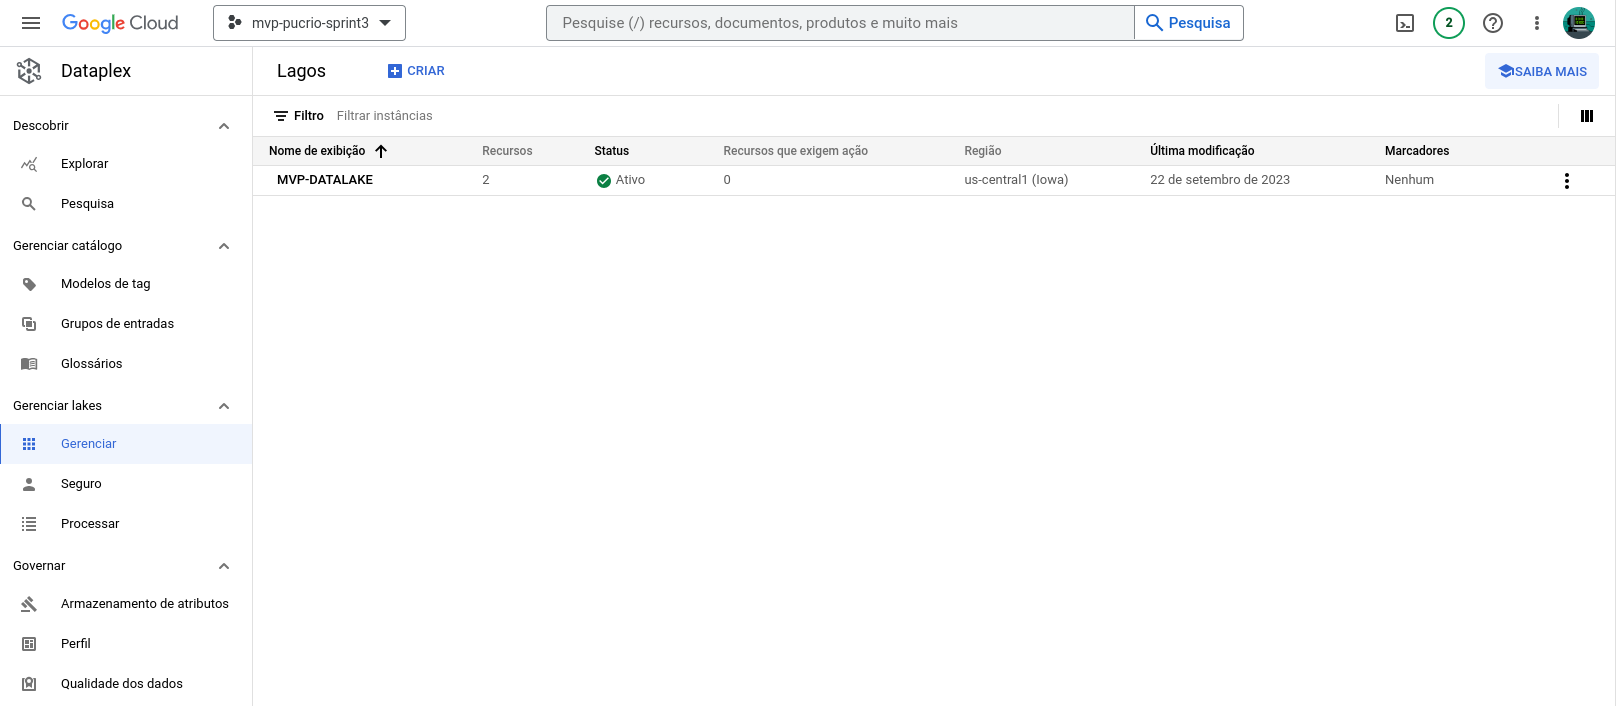

Para organizar a estrutura do Data Lake, optamos por criar duas zonas básicas:
+ **Raw Data Zone**: espaço onde ficam armazenados em seu formato bruto, disponíveis para criação de data pipelines, ETL etc;
+ **Trusted Data Zone**: espaço onde ficam armazenados os dados que passaram por processo de ETL e foram tratados, possuindo garantias de Data Quality, sendo considerados exatos e confiáveis.

Criamos ambas as zonas em nosso Data Lake criado no Dataplex, e as vinculamos aos seus respectivos buckets, cada um para armazenar o tipo próprio de dados de cada Zona.

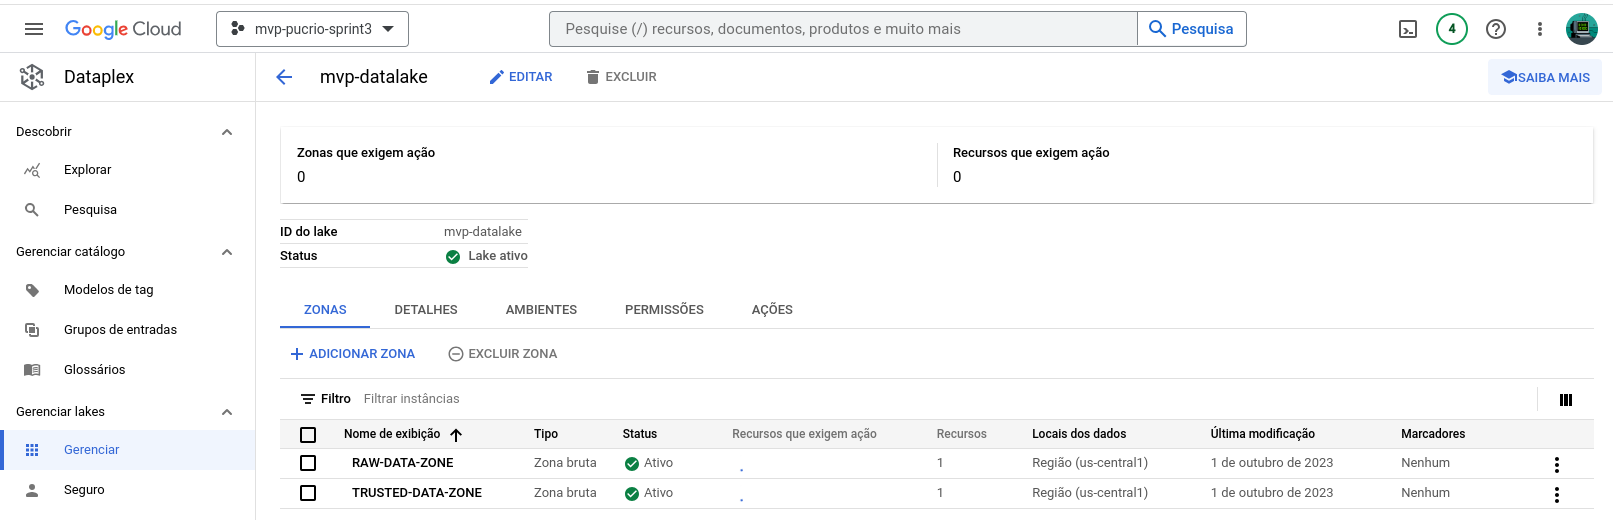

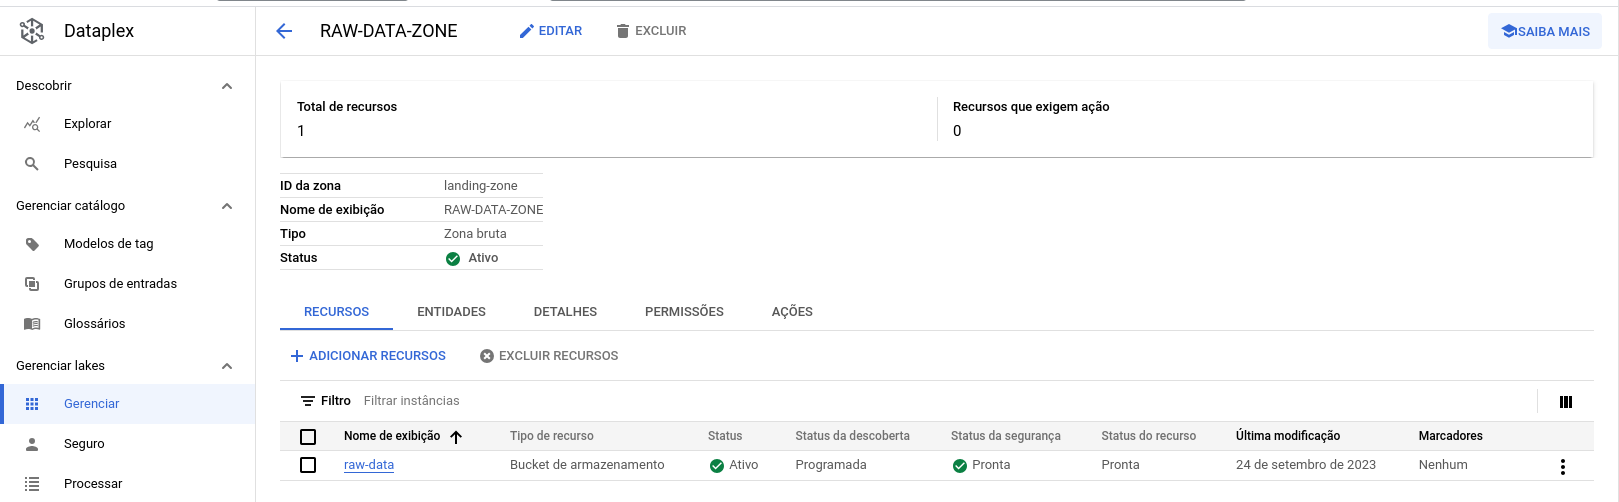

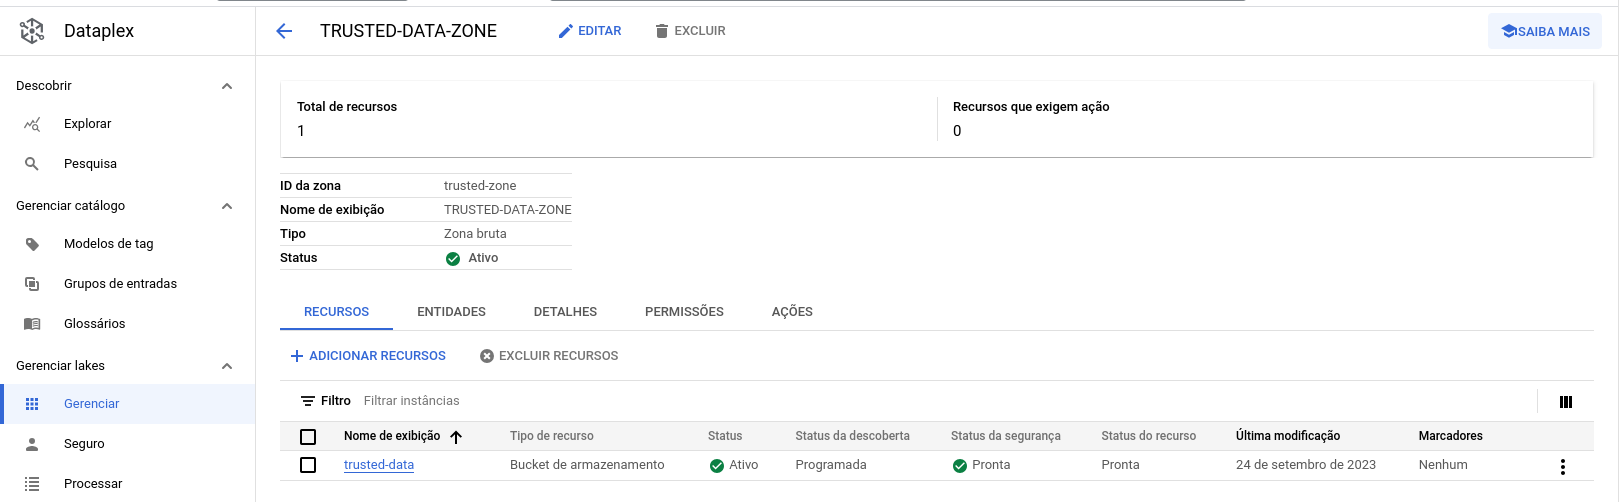

A estratégia é carregar os arquivos Excel como tabelas flat para o Data Lake no Google CLoud, seguindo a sequência de zonas, conforme o nível de organização da estrutura dos dados, para aplicar operações ETL com ferramenta nativa da Nuvem, para então realizar consultas e análises dos dados tradados para resolução do problema proposto.

## Carga

Inicialmente havia sido planejado o uso de apenas dois buckets, Raw Data e Trusted Data, e da ferramenta de ETL Dataprep. Esta última uma ferramenta bastante simples e versátil para realizar diversas transformações em dados, porém mostrou-se incompleta por não abranger a parte de linhagem de dados, diferentemente do Data Fusion.

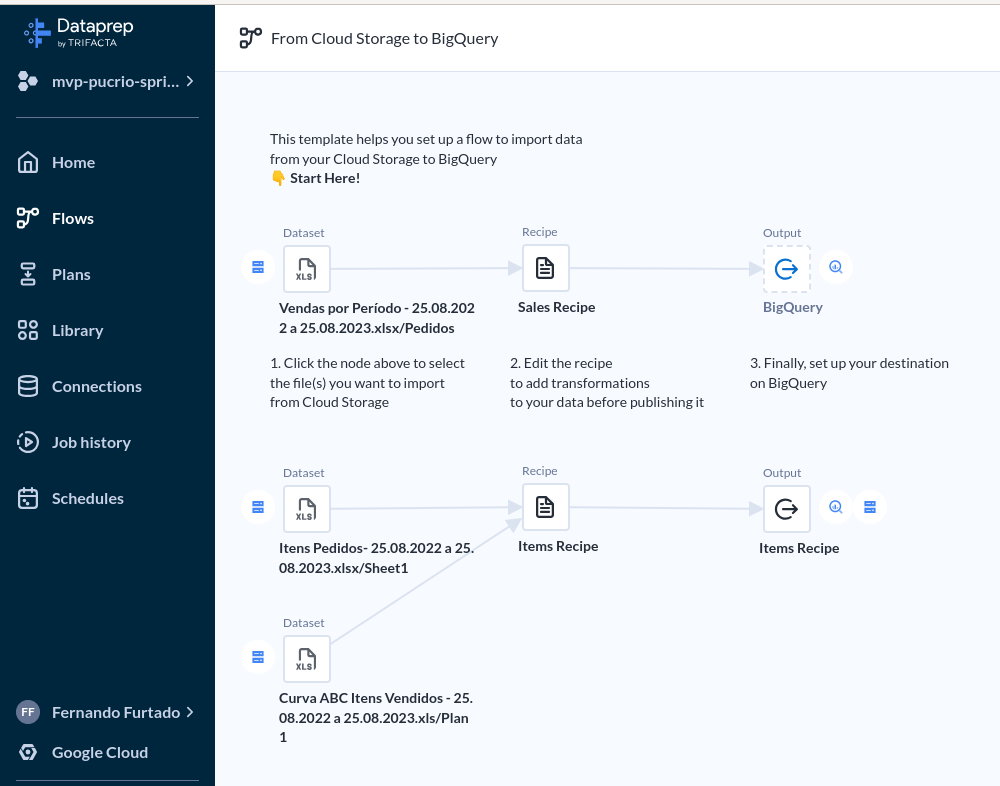

No entanto, ao iniciar os trabalhos de construção do pipeline com o Data Fusion, notou-se outra dificuldade: a de manipular arquivos Excel com o Data Fusion, sobretudo quando os cabeçalhos das colunas apresentavam espaços em branco e barras em seus nomes (característica essa que gerava erro incontornável no uso da ferramenta).


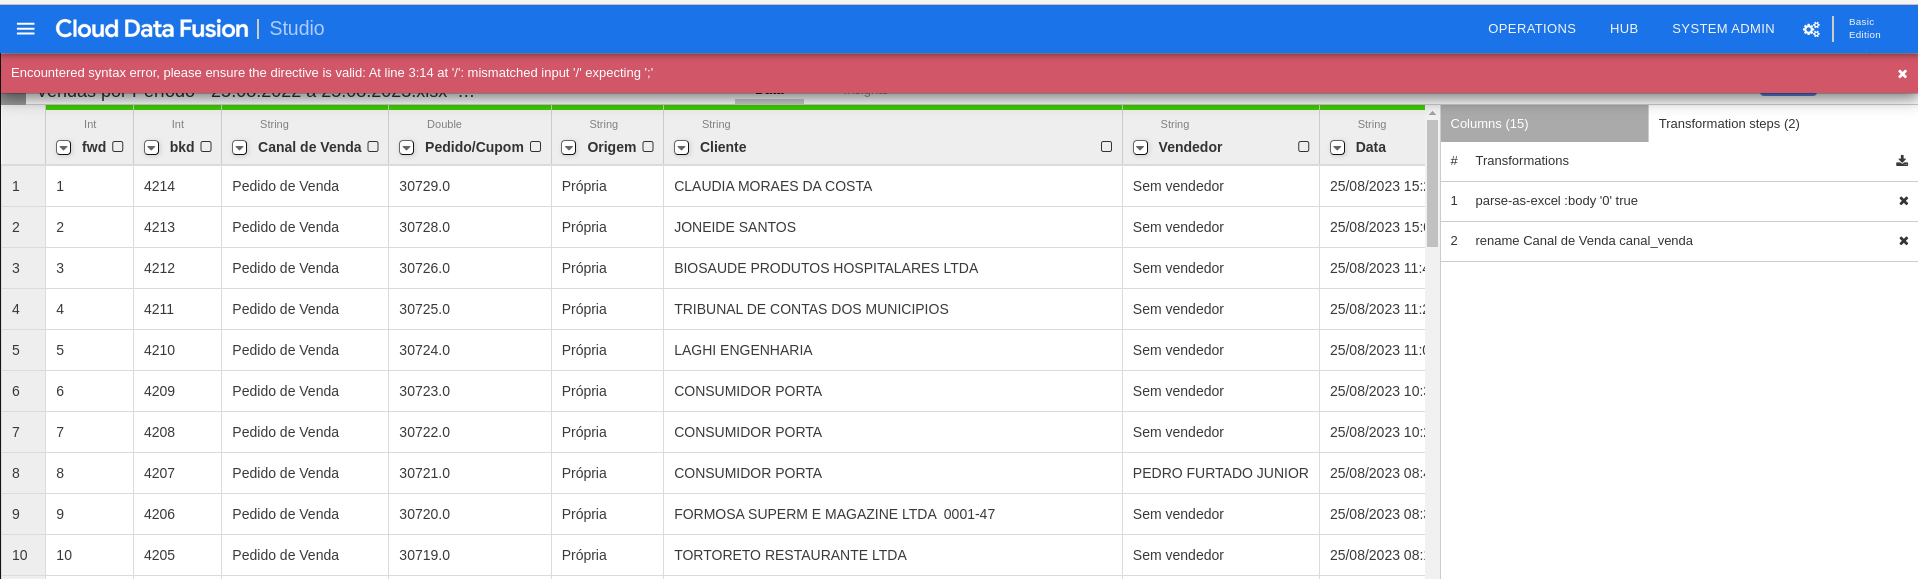

Para remediar tal dificuldade, optamos por implementar a ideiade uma zona de transição para receber os arquivos Excel, e então transformá-los em CSV (com as devidas correções de nomenclatura de cabeçalho) utilizando a ferramenta Dataprep, para finalmente armazená-los no bucket de Trusted Data.

A partir de então, poderíamos de fato iniciar a contrução do pipeline de ETL com a ferramenta Data Fusion.

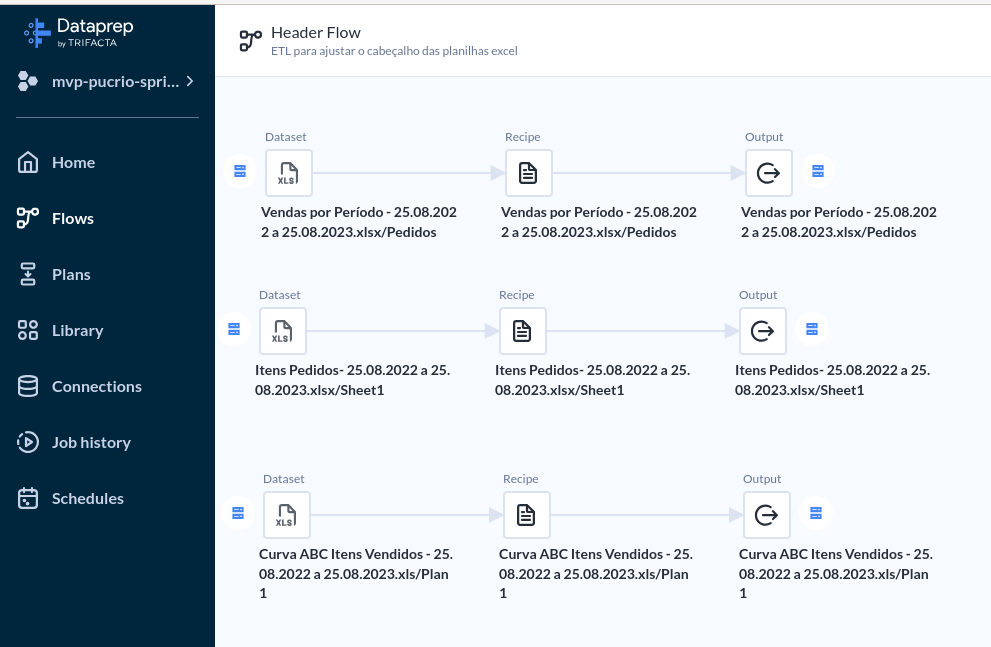

Os Recipes representam as sequencias de transformações aplicadas aos dados no pipeline, equivalente ao Wrangle do Data Fusion. Dentro dele, deletamos algumas colunas irrelevantes e renomeamos as que permaneceram, para poderem ser usadas no Data Fusion.

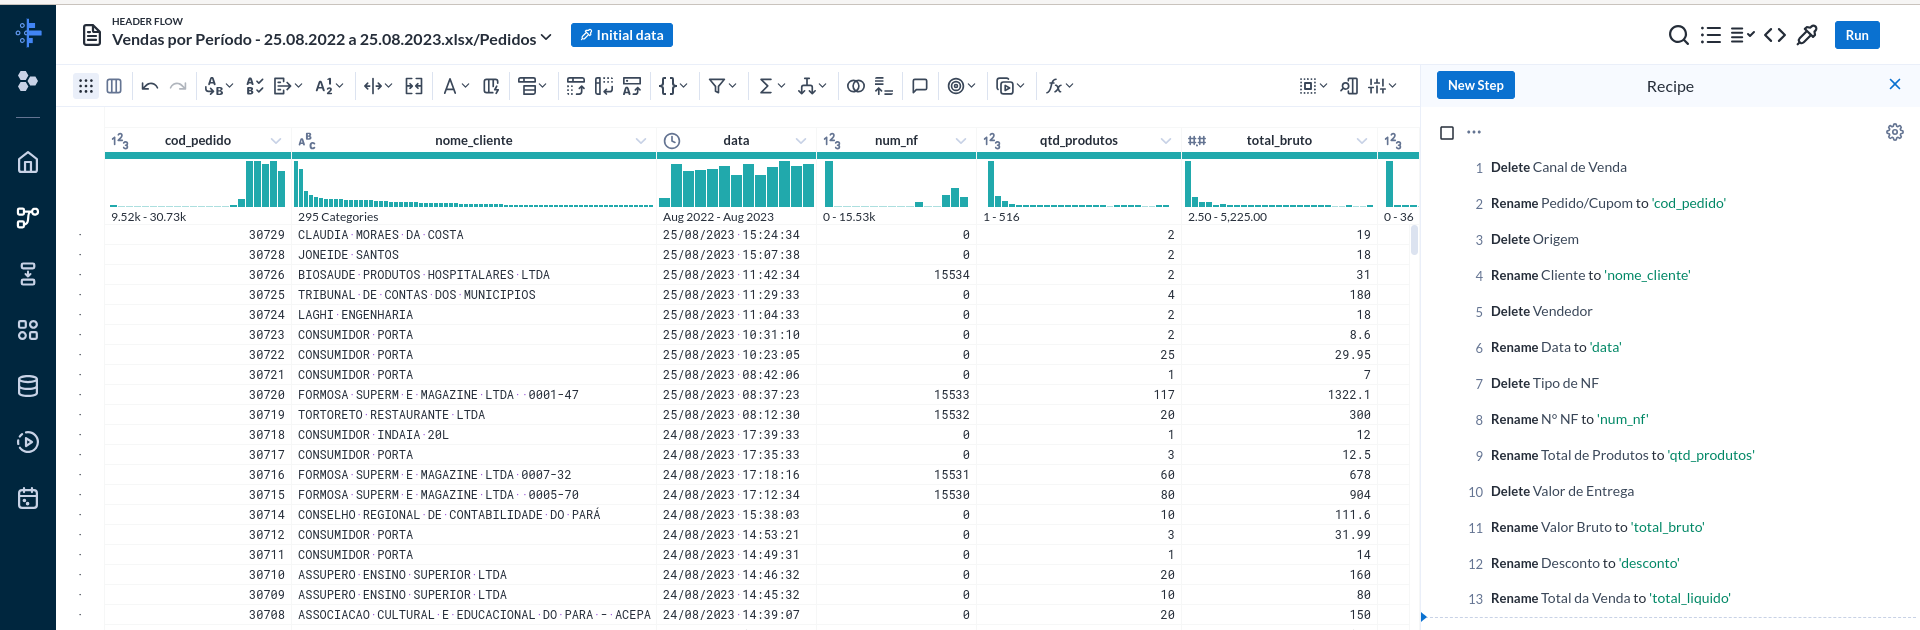

Ao final, um job grava os dados no bucket Trusted Data no GCS.

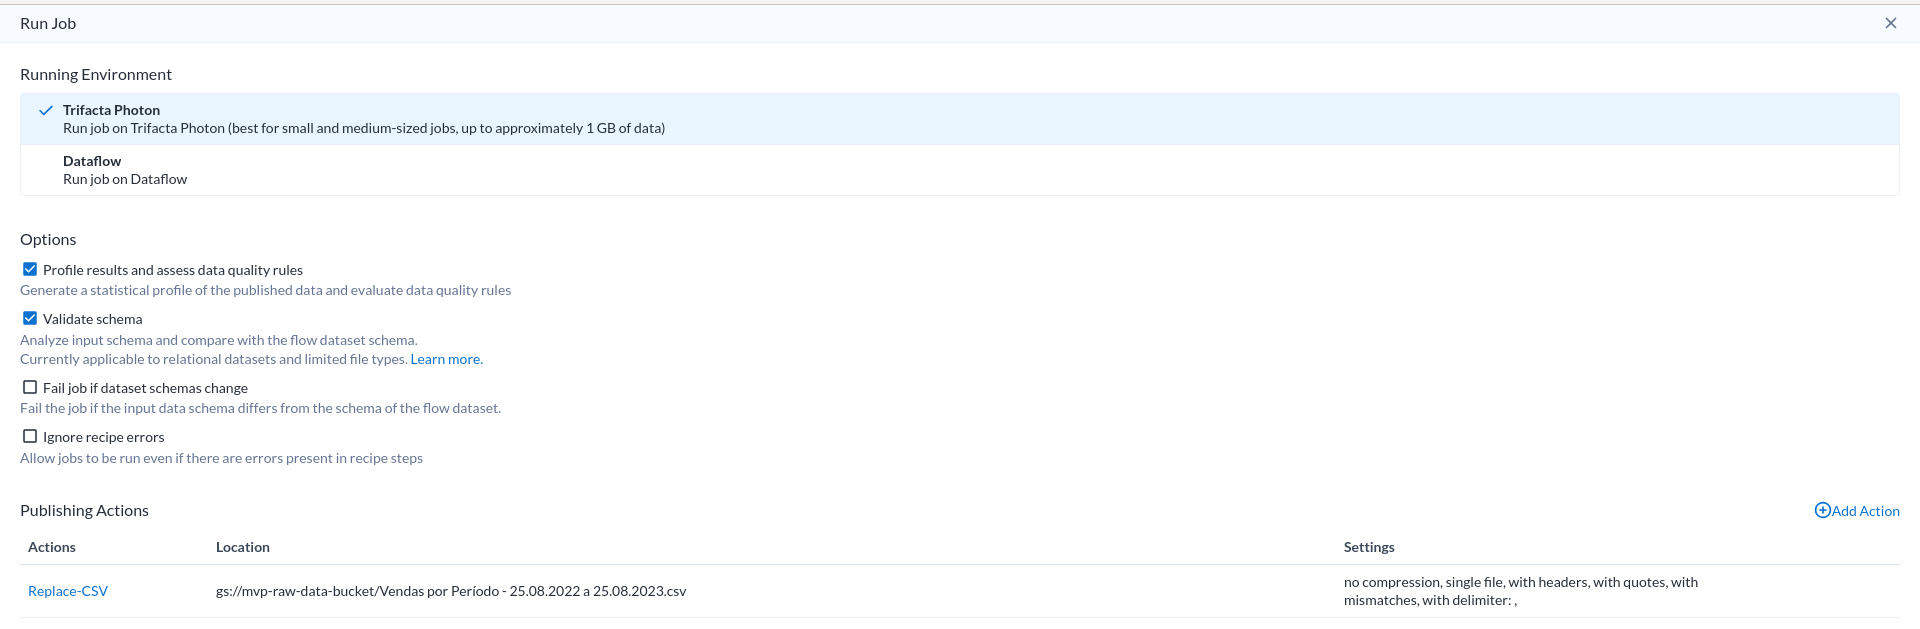

Posteriomente, no Data Fusion toda a parte de ETL era realizada nos dados, com operações de convesões, arredondamentos, etc. Foram criados para tanto, dois pipelines para as duas tabelas resultantes do processo.

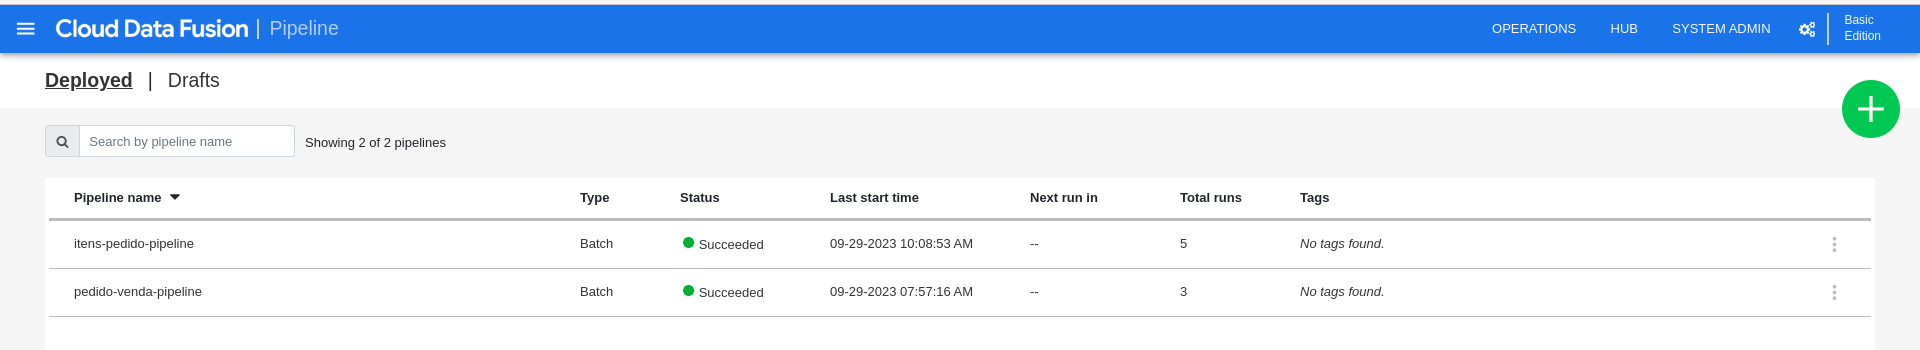

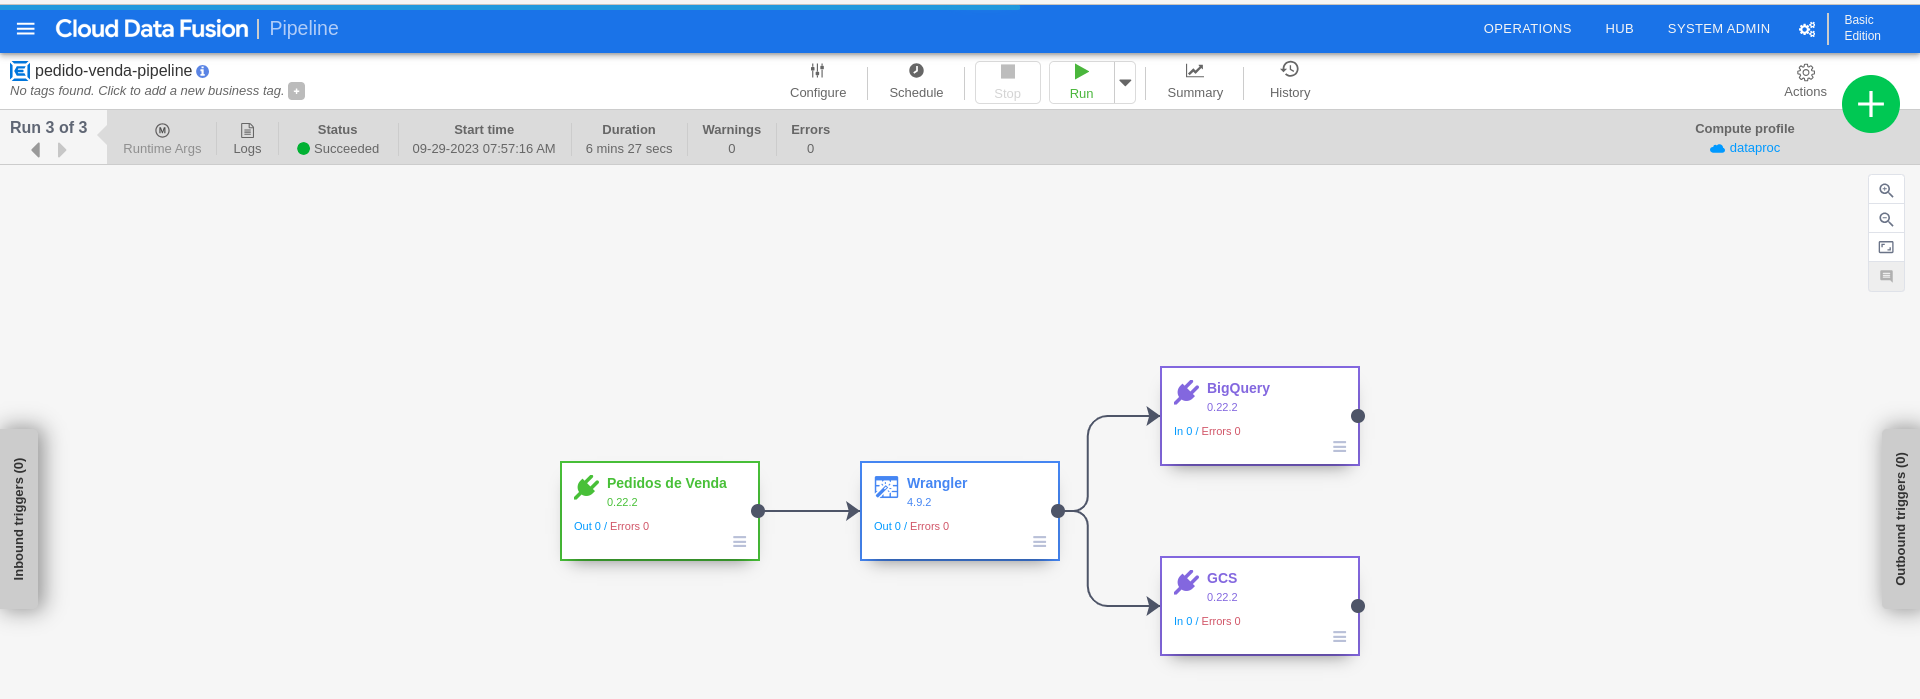

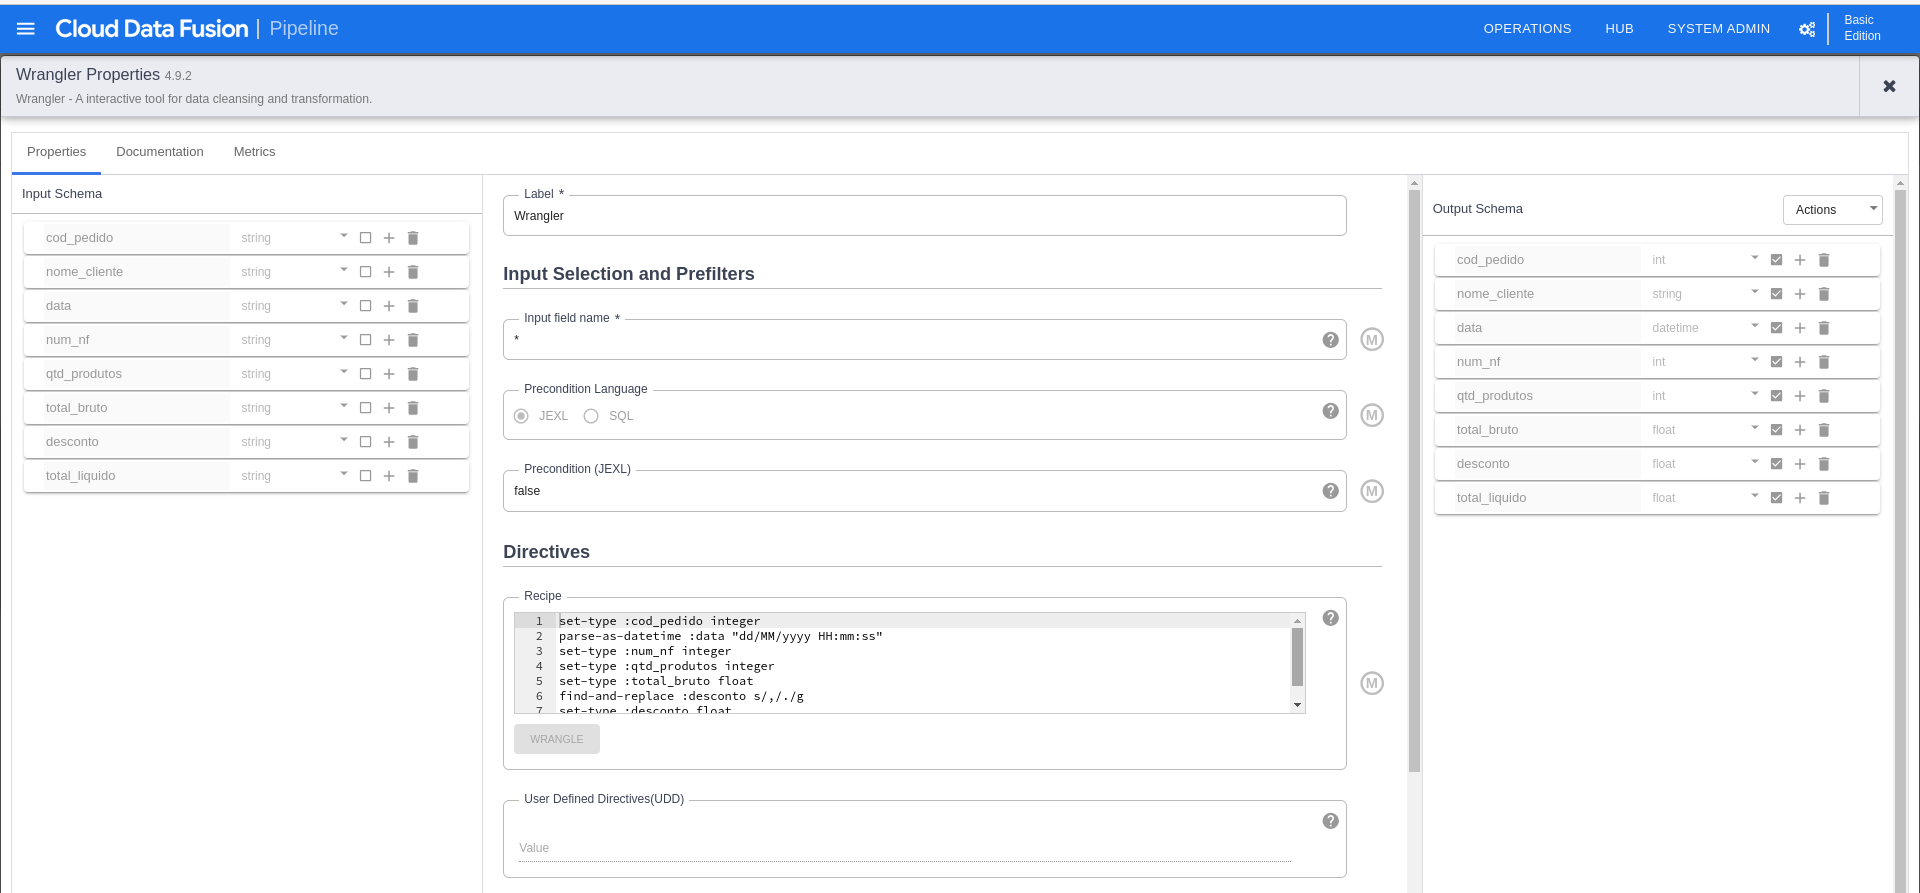

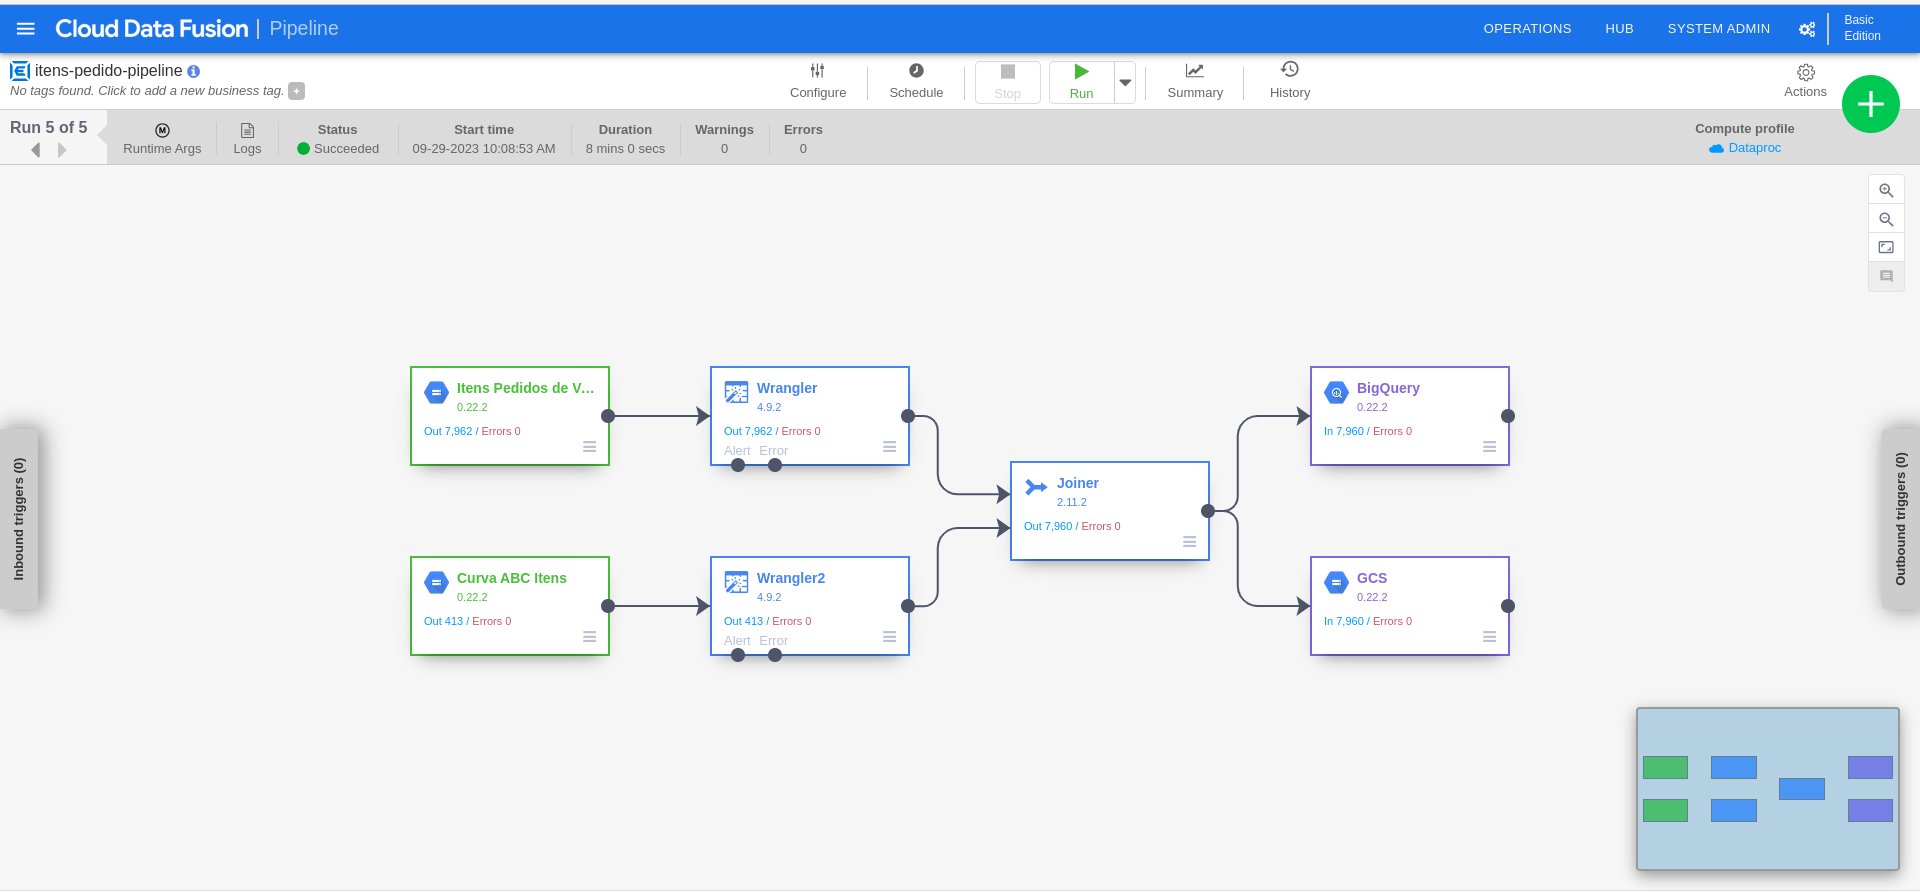

## Análise

Com os pipelines criados e executados, foram criados os datasets e tabelas no Big Query, para realizar as análises dos dados: tb_pedido_venda e tb_itens_pedidos. Foram também criadas consultas nas tabelas para responder as perguntas elencadas no problema do presente trabalho.

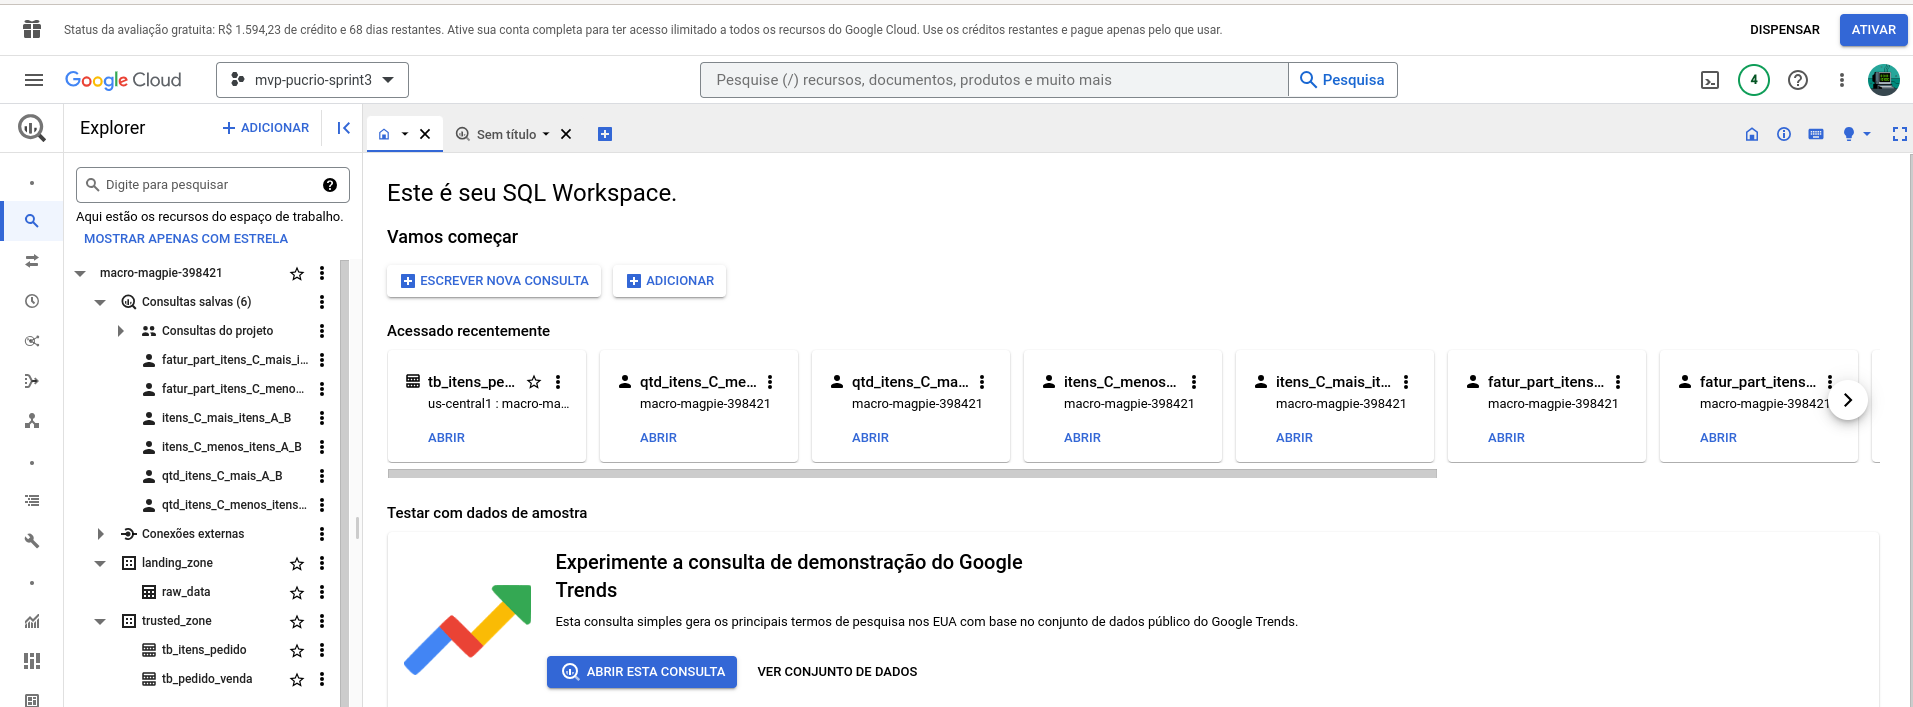

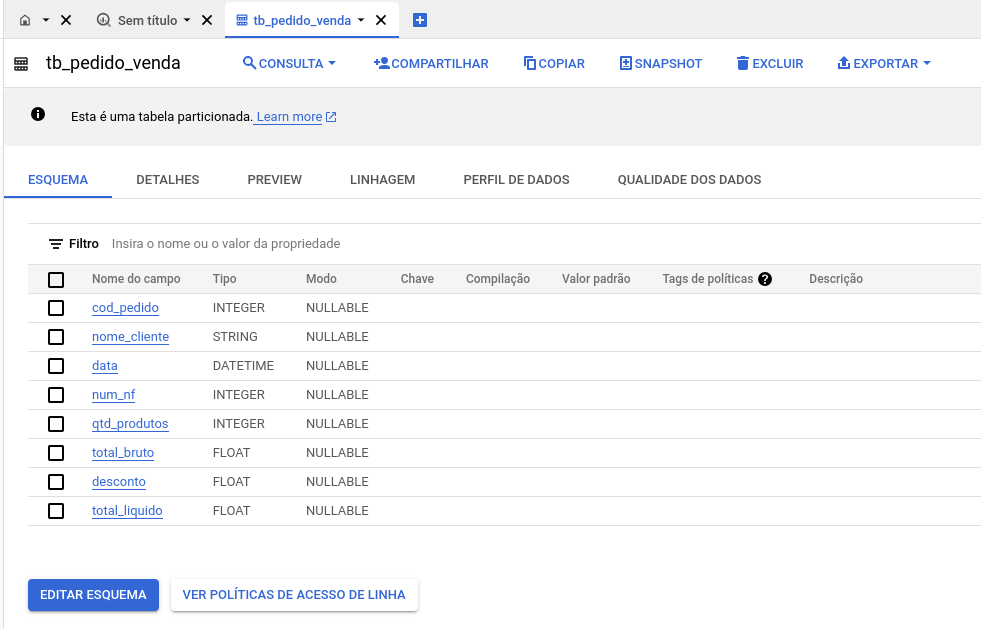

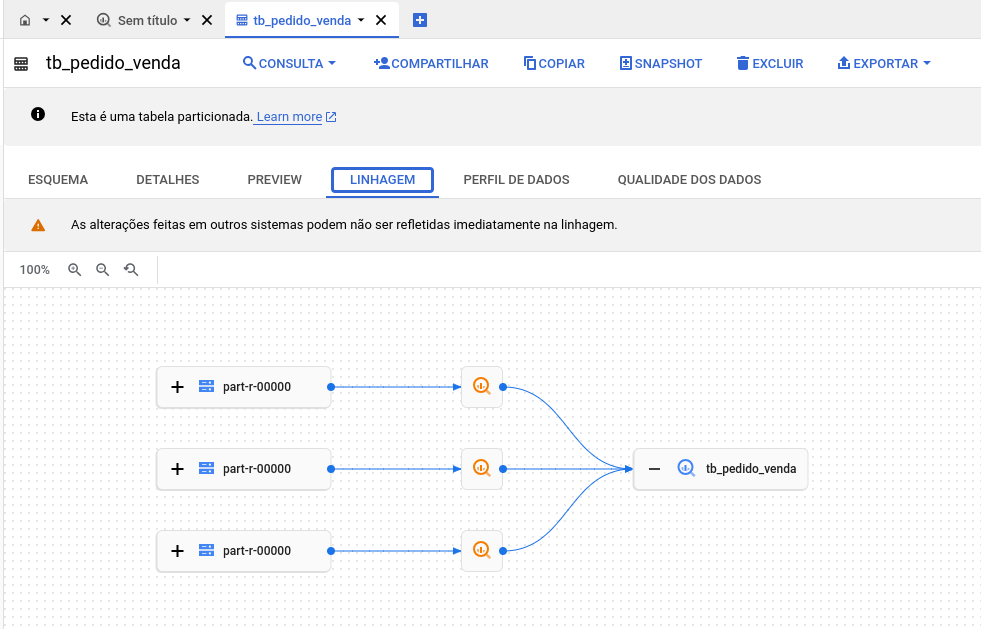

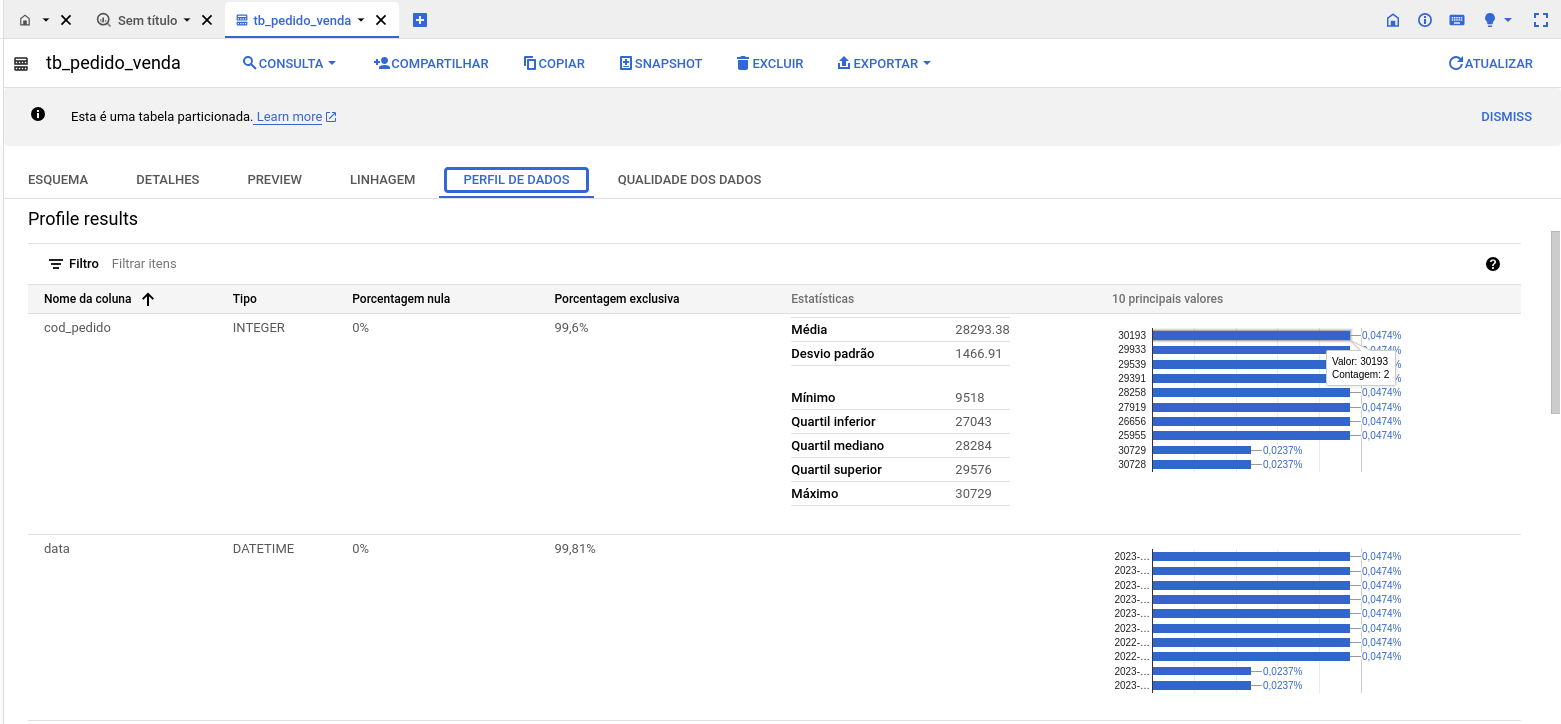

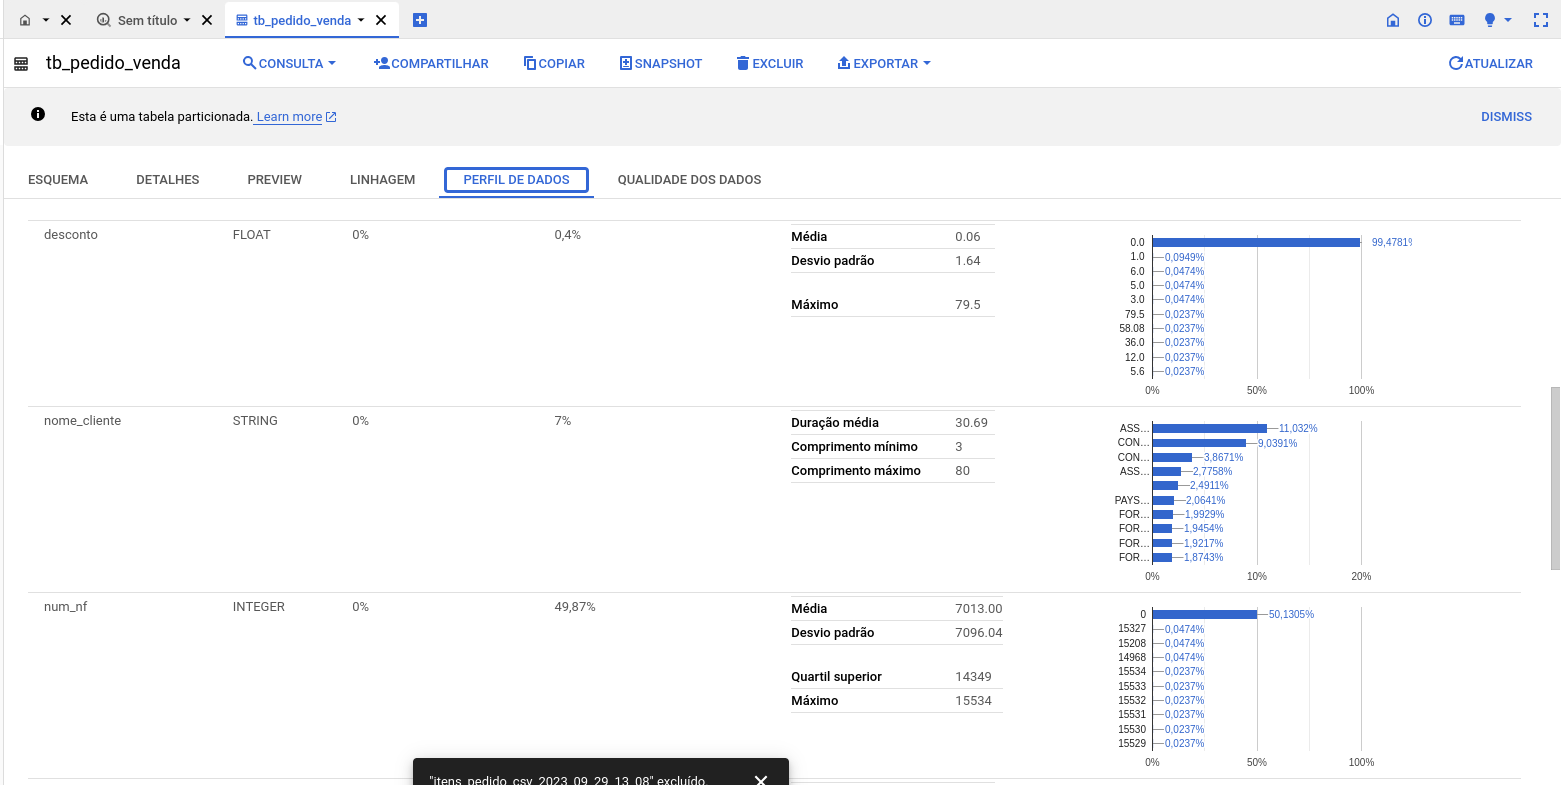

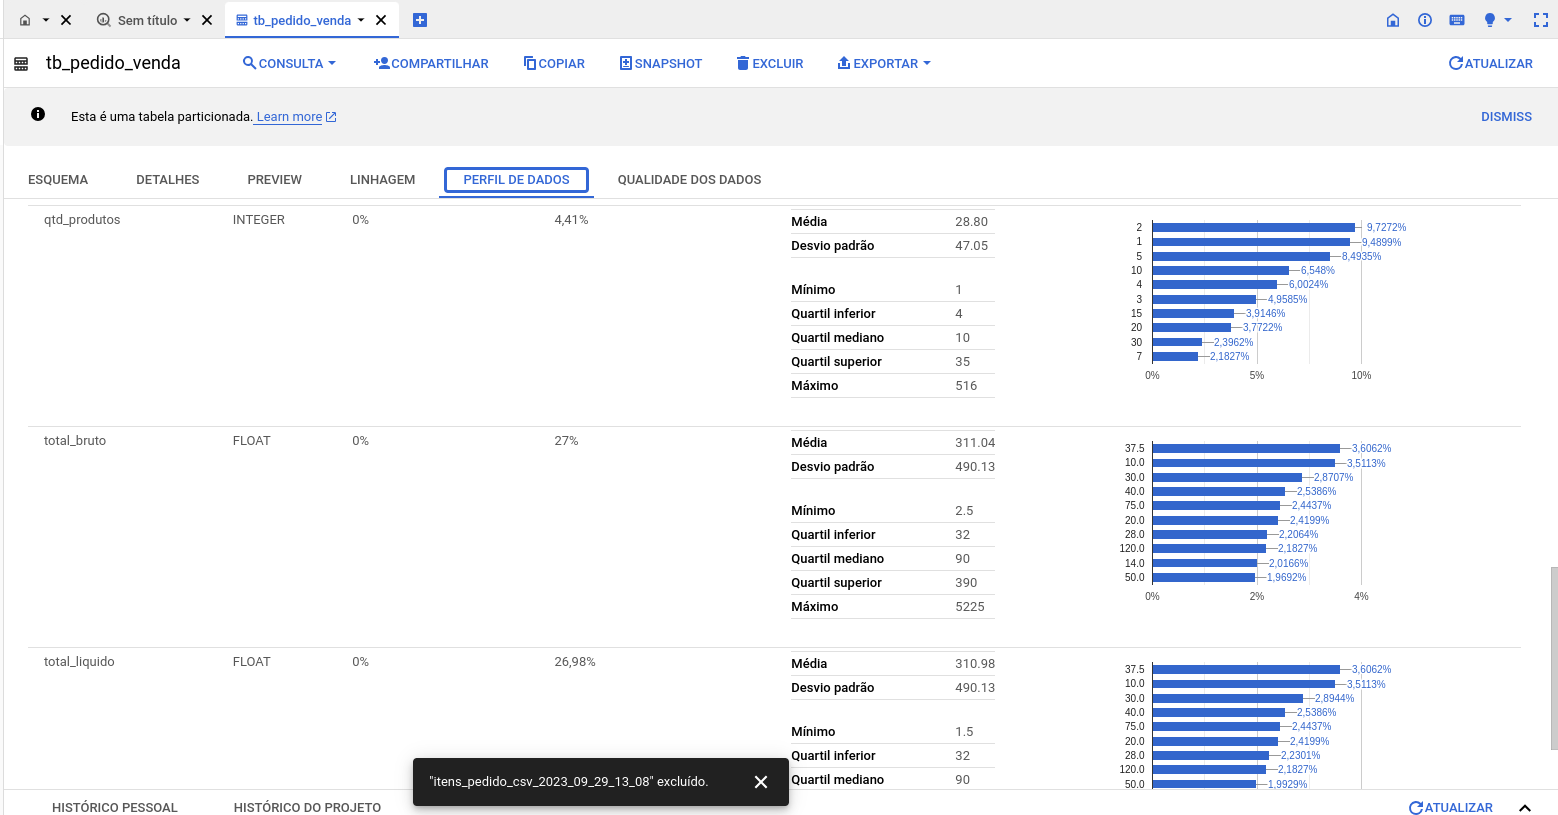

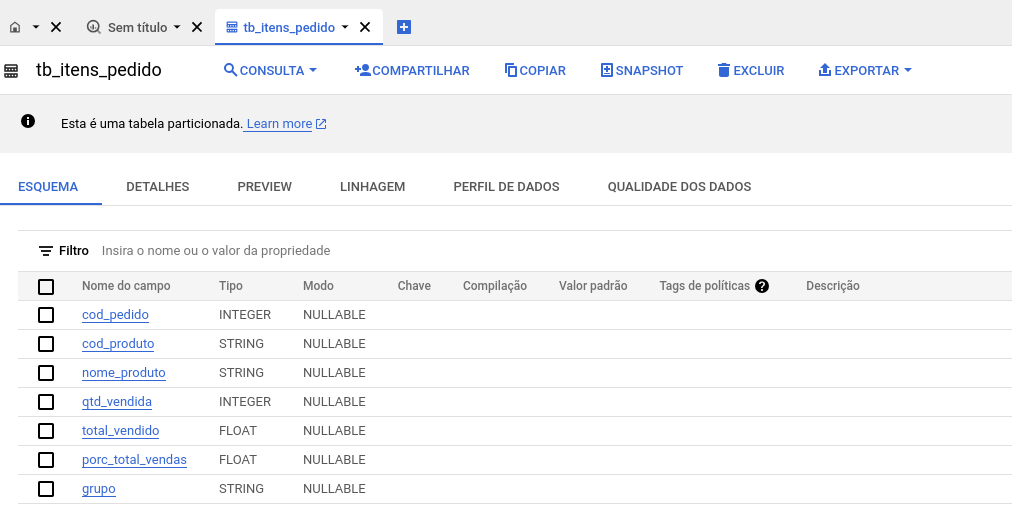

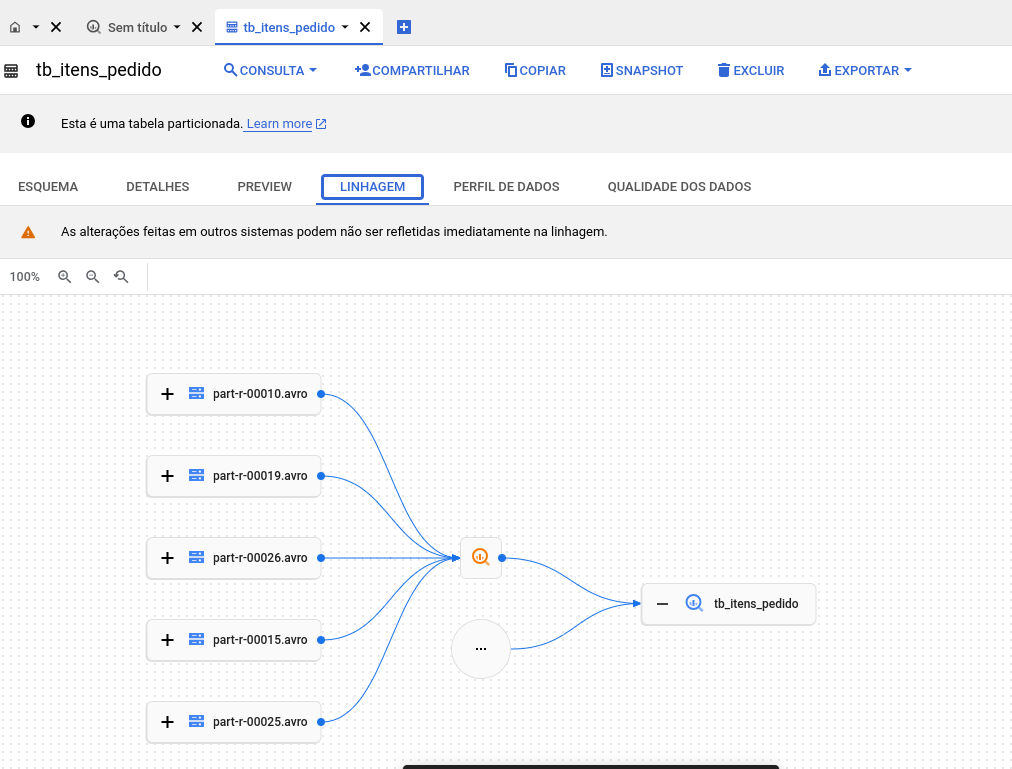

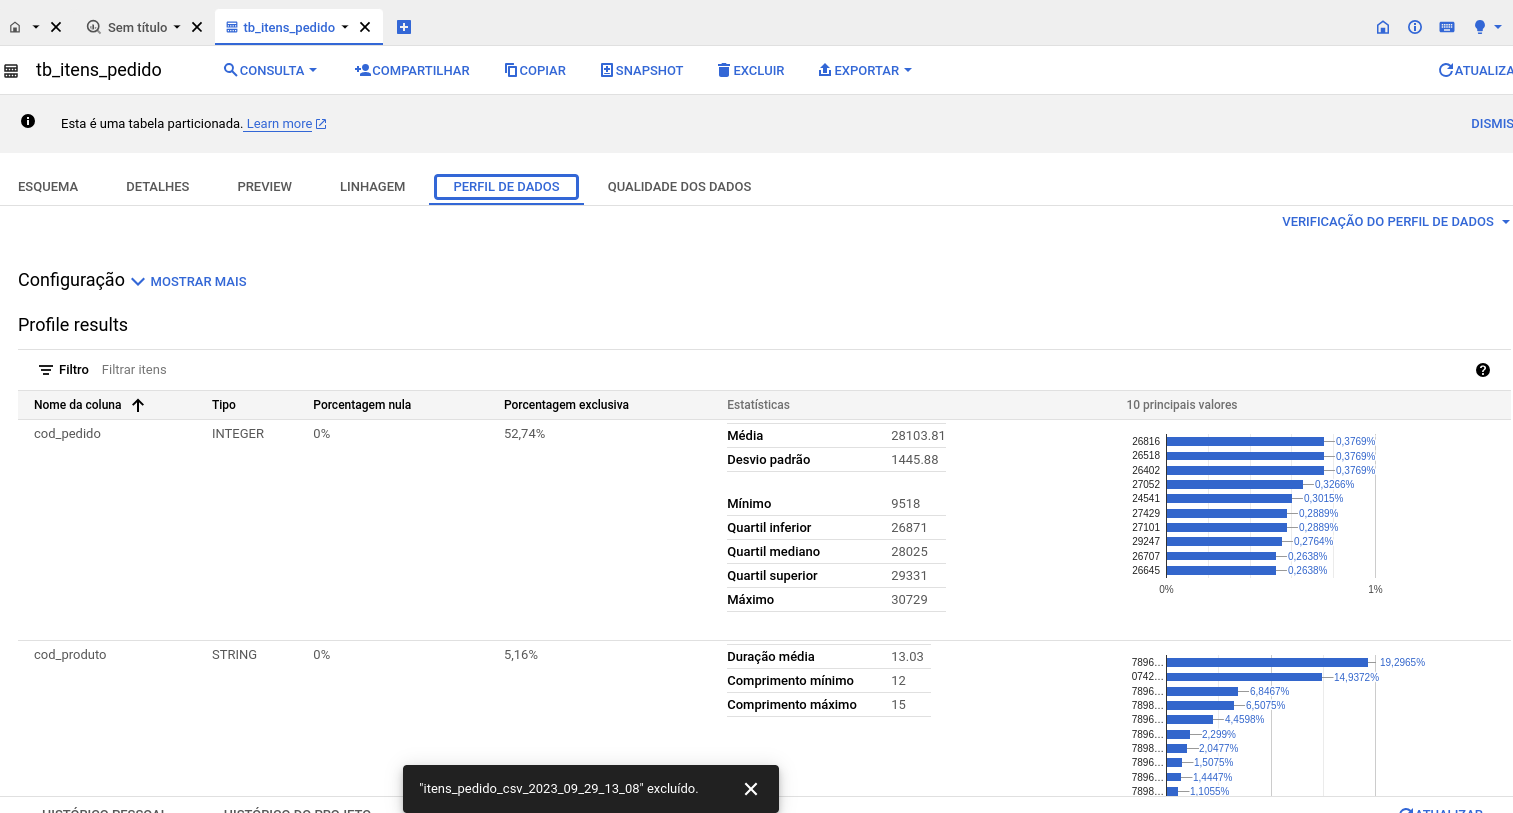

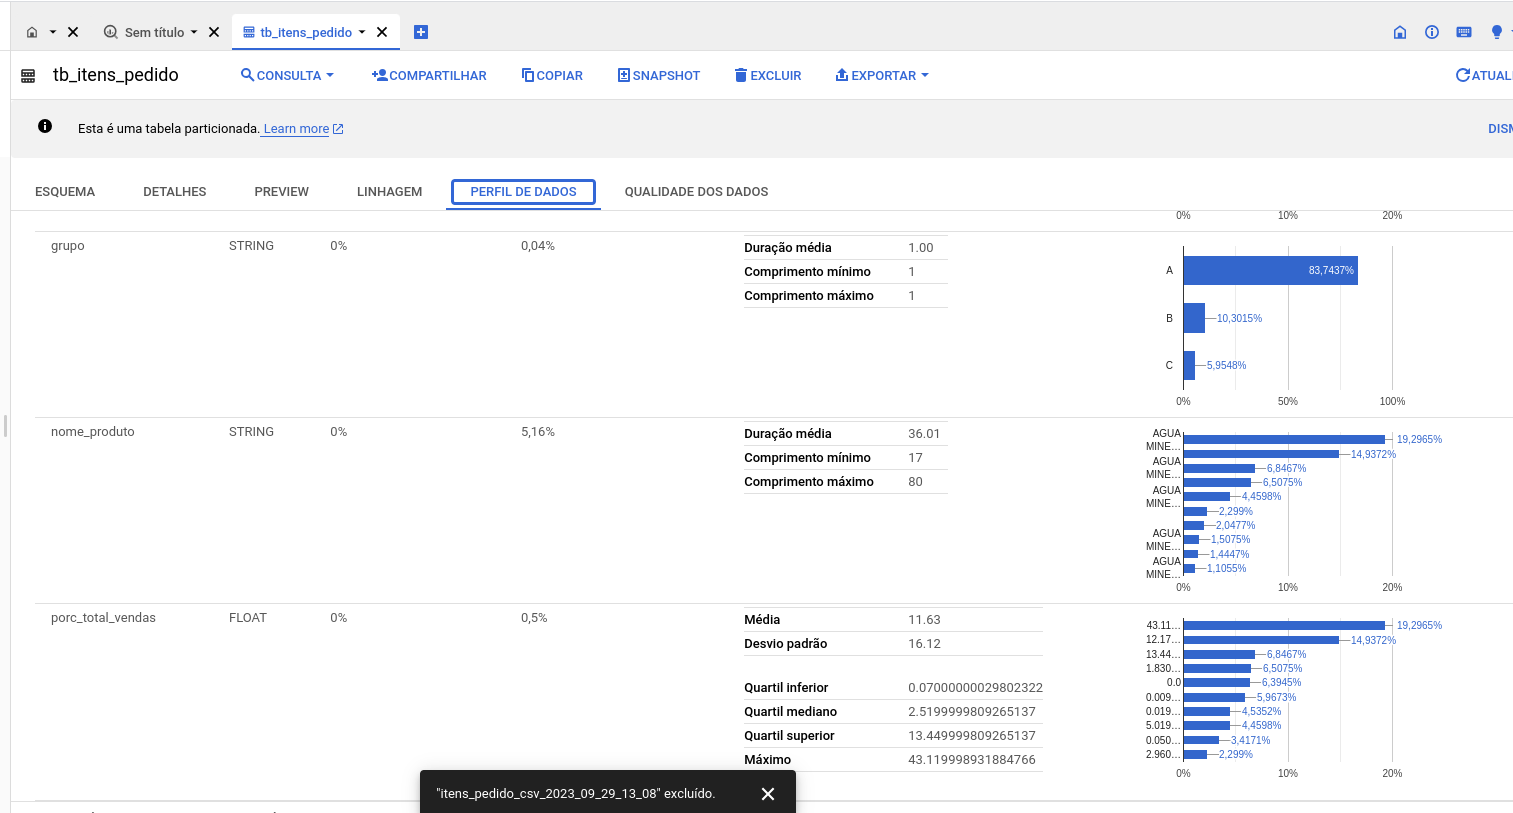

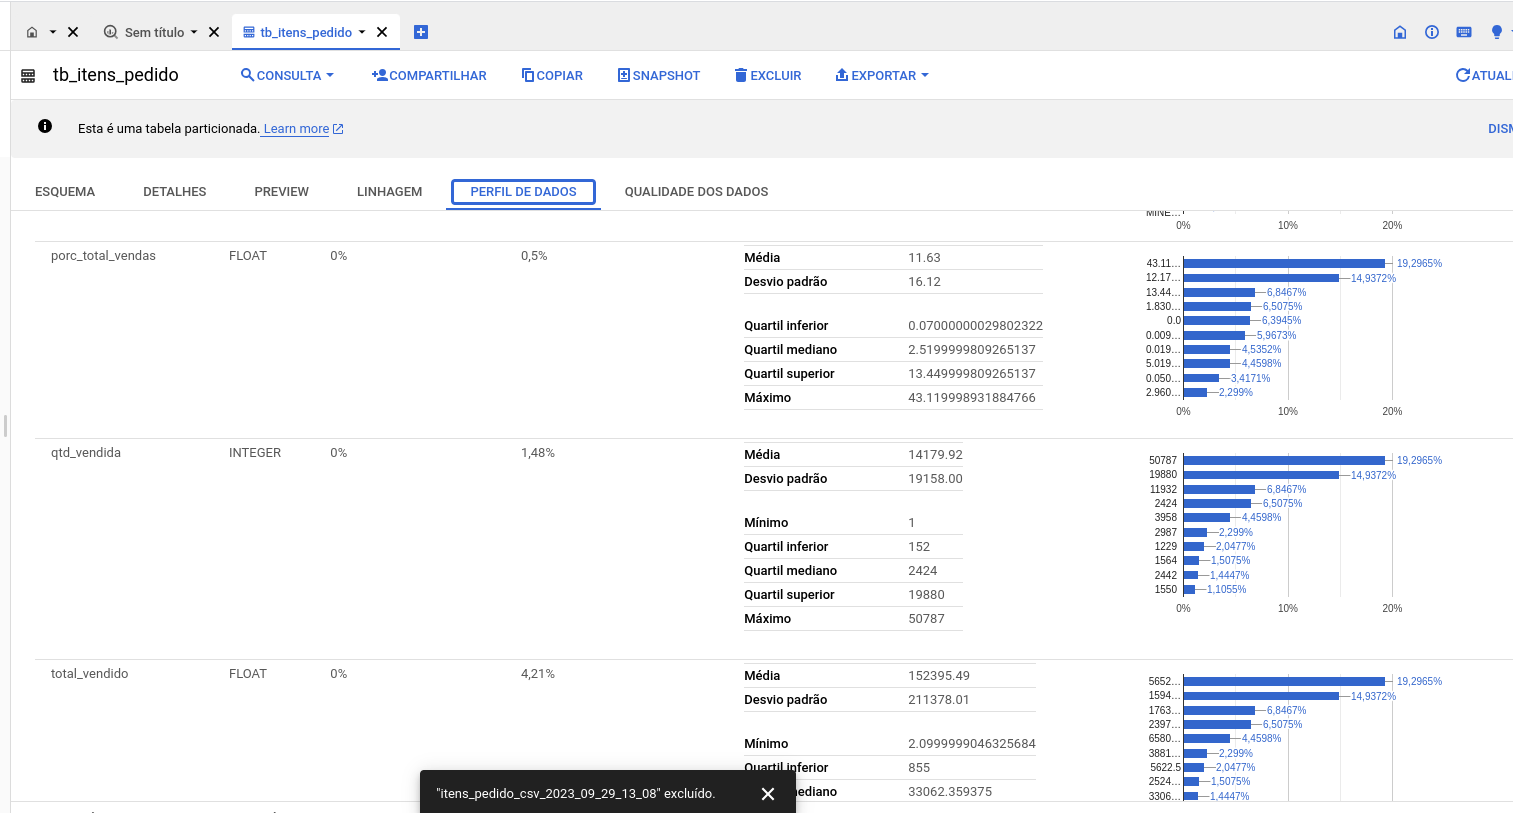

### Qualidade de Dados

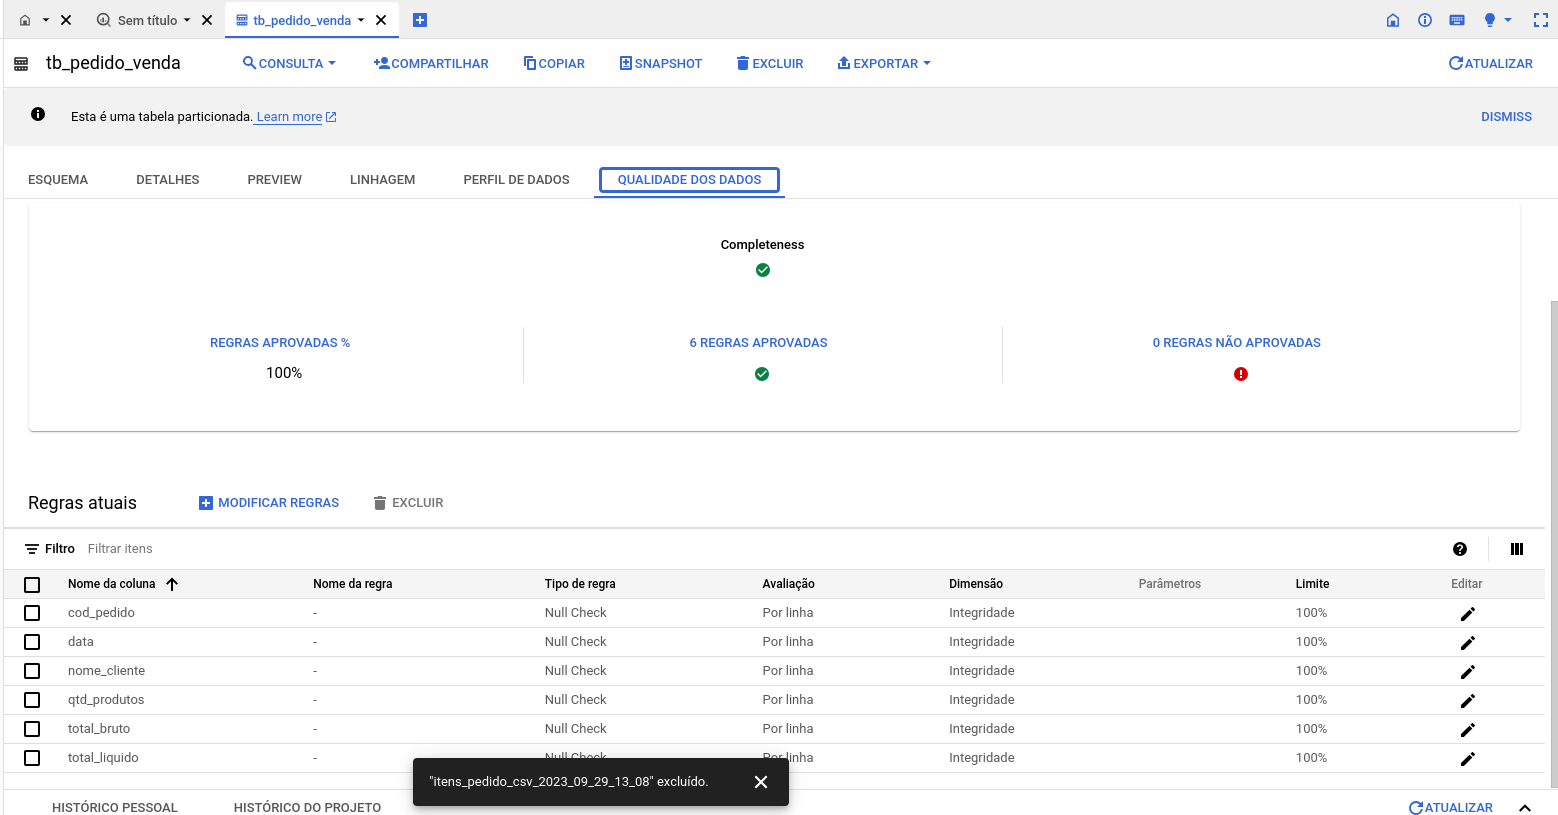

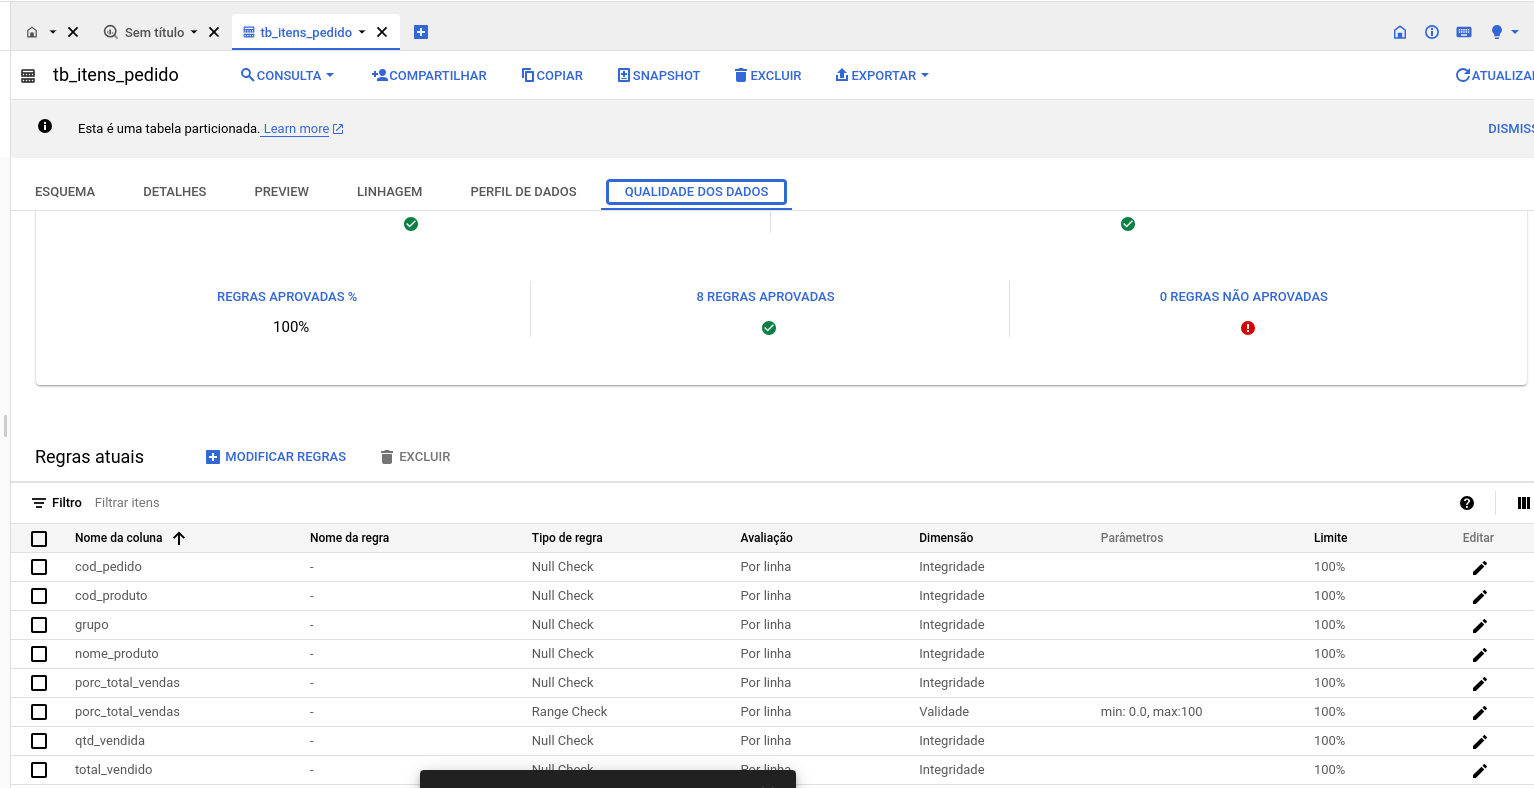

### Solução do Problema

As consultas sobre os dados demonstram que é possível à empresa excluir dos seus produtos itens irrelevantes em relaçção ao faturamento e otimizar os itens de maior impacto financeiro.

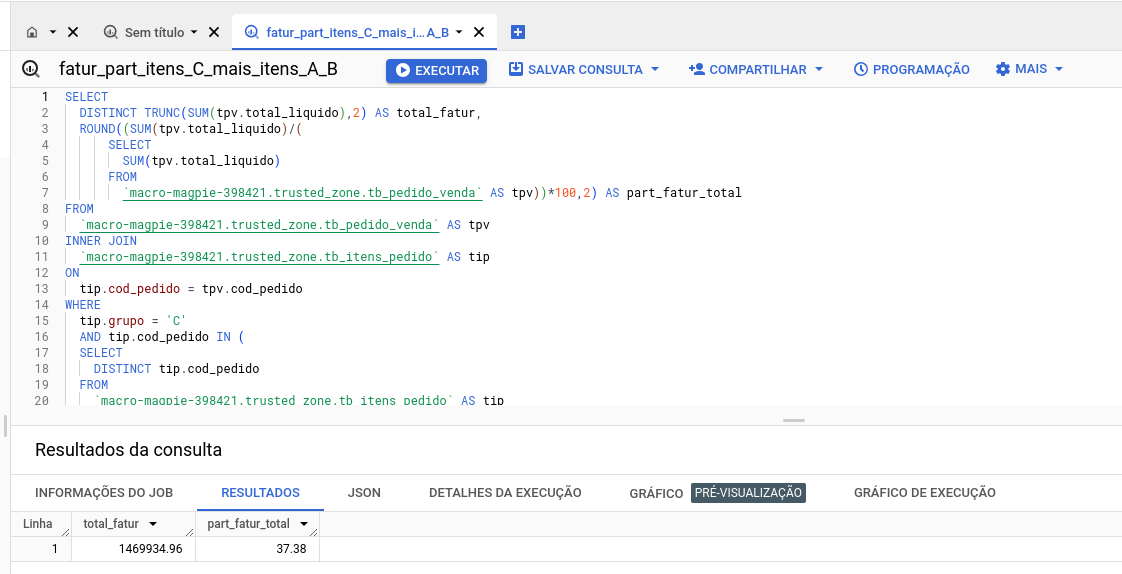

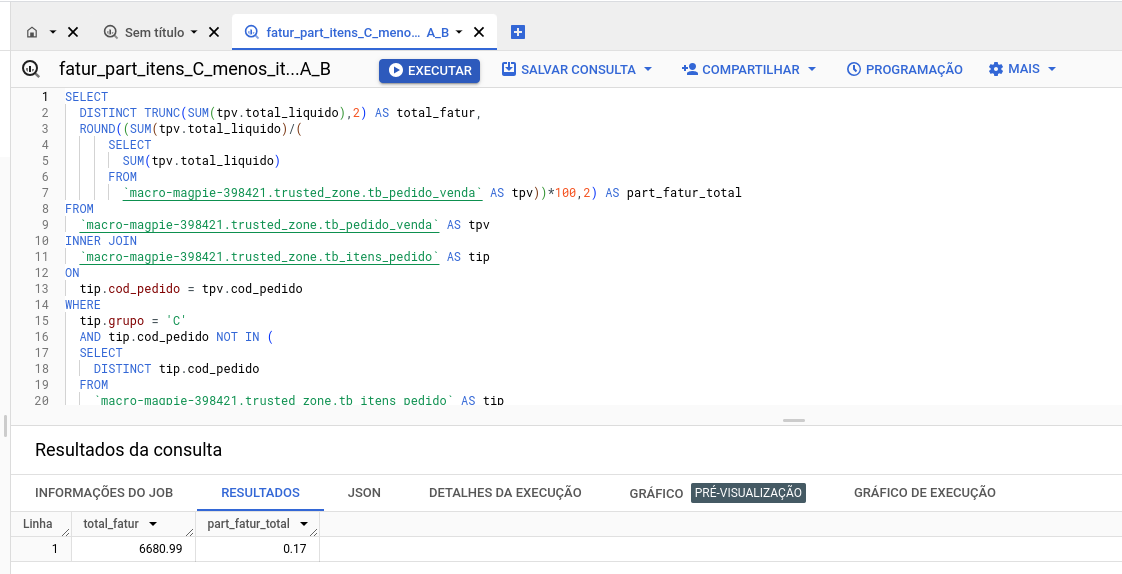

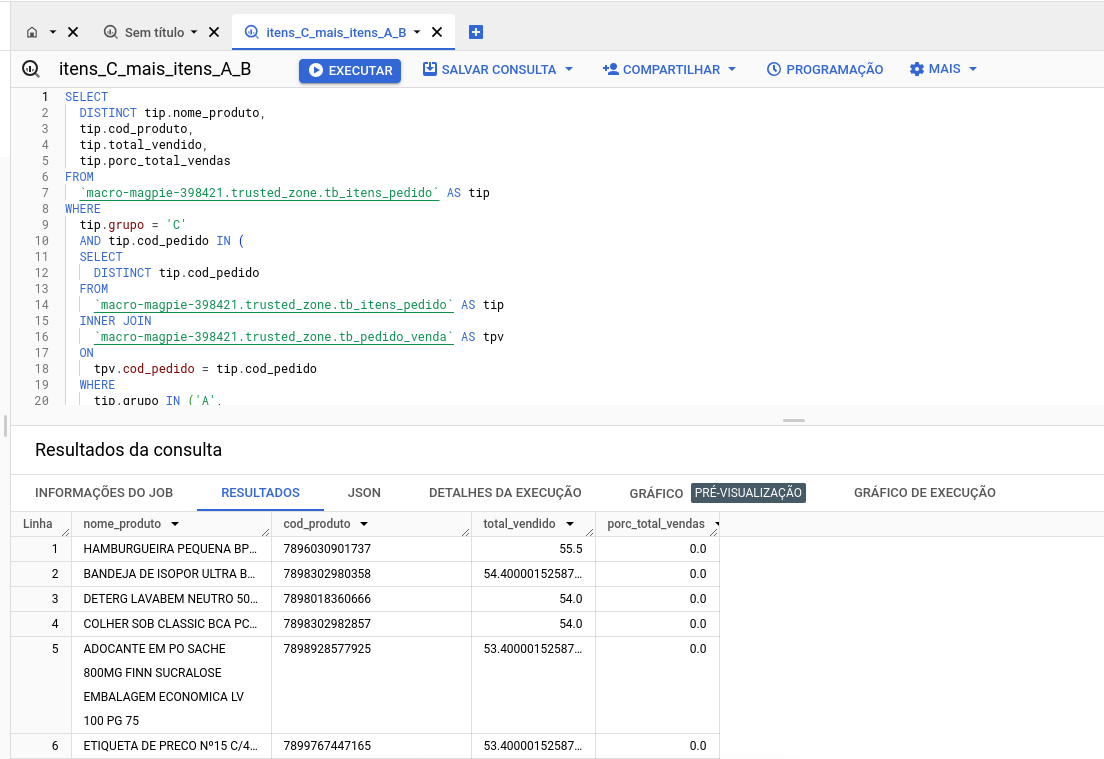

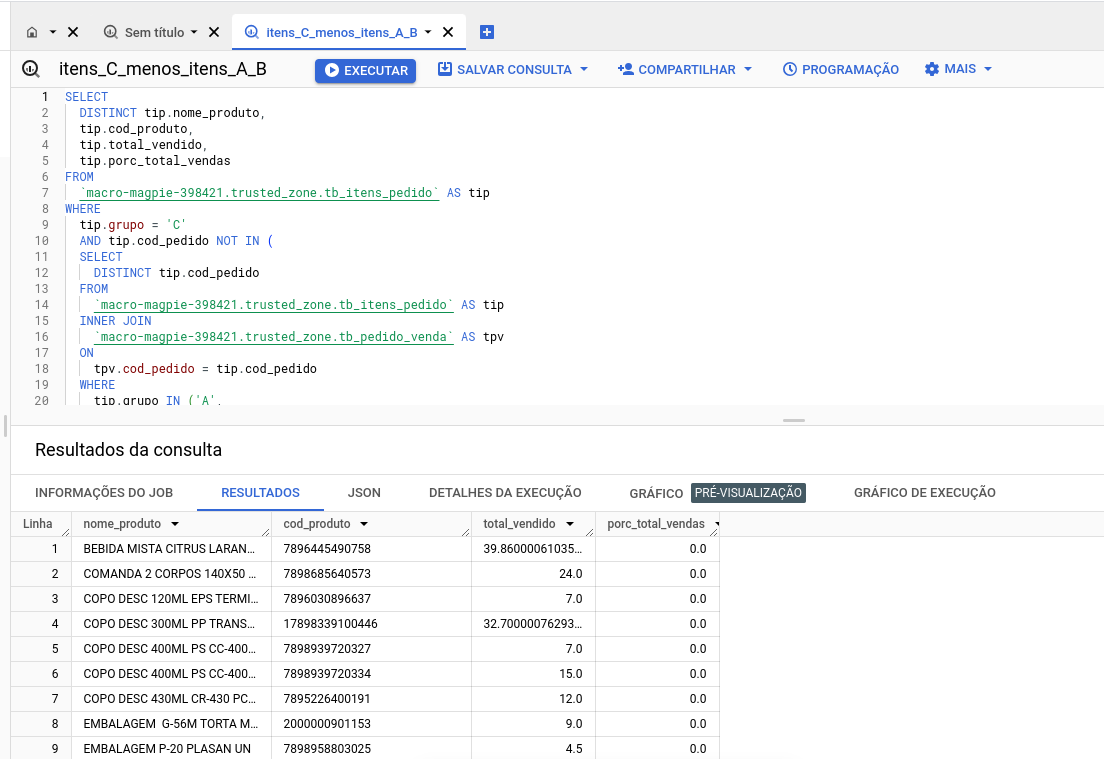

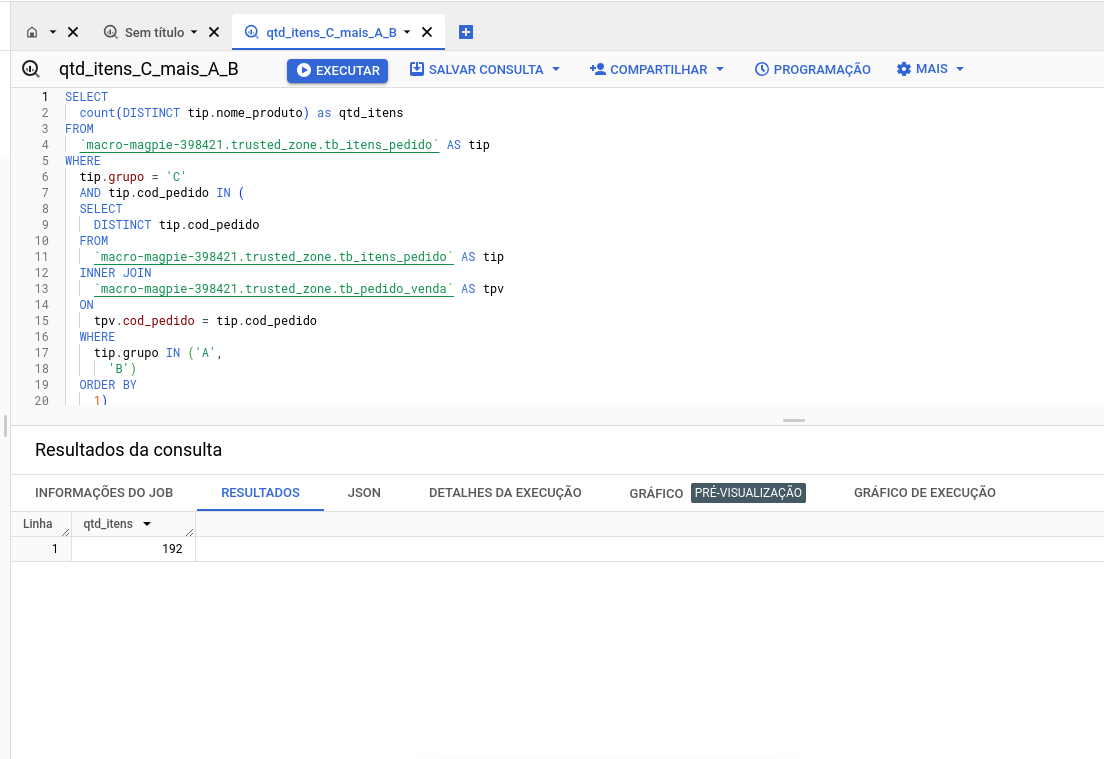

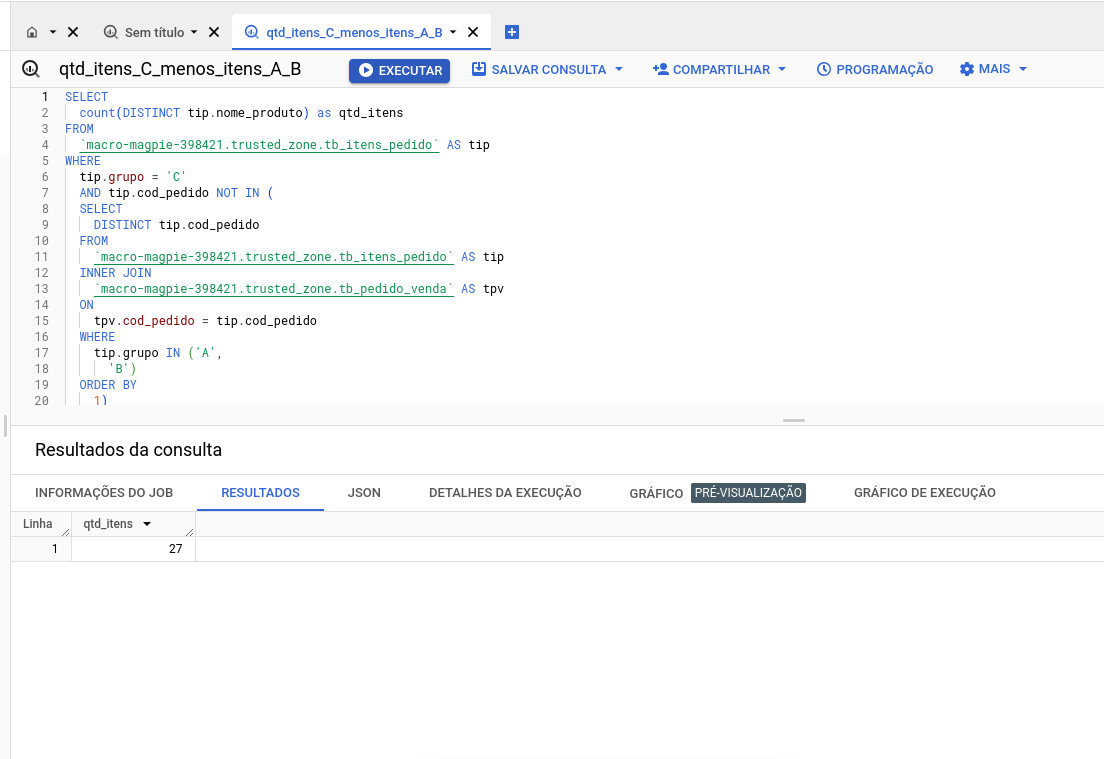